### This notebook is to plot hysteresis patterns for all 7 of my summer storms

Import all data -  Constituents, water surface elevation (WSE) and sonde turbidity and fDOM to plot hysteresis

In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import matplotlib.collections as mcoll
import matplotlib.path as mpath

# directories where the CSV files are stored
storm_directory = 'C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms'
sonde_directory = 'C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/sonde'
WSE_directory = 'C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/WSE'

# dictionaries to store the data frames
storms = {}
sondes = {}
WSE = {}

# iterate over all files in the directory
# storms:
for filename in os.listdir(storm_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(storm_directory, filename) # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        storms[key] = df                                    # store the data frame in the dictionary

# sondes:
for filename in os.listdir(sonde_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(sonde_directory, filename)
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)'])
        df['Date_Time'] = pd.to_datetime(df['Date (MM/DD/YYYY)'] + ' ' + df['Time (HH:mm:ss)'])
        df['Date_Time'] = df['Date_Time'].dt.round('min')  # round to the nearest minute
        df = df.drop(columns=['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)'])  # drop the original date and time columns
        df = df.set_index('Date_Time')                                  # set date time as the index
        df = df.dropna(how='all', axis=1)                               # drop columns where all values are NaN
        key = filename[:-4]
        sondes[key] = df

# WSE:
for filename in os.listdir(WSE_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(WSE_directory, filename)
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Date_Time'])
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        df = df.resample('1T').interpolate()                # resampling with a 1 min interval
        key = filename[:-4]
        WSE[key] = df

In [8]:
# delete all columns after the turbidity column
storms['st1_down'] = storms['st1_down'].iloc[:, :8]
storms['st1_up'] = storms['st1_up'].iloc[:, :8]
storms['st2_down'] = storms['st2_down'].iloc[:, :10]
storms['st3_down'] = storms['st3_down'].iloc[:, :10]
storms['st4_down'] = storms['st4_down'].iloc[:, :7]
storms['st4_up'] = storms['st4_up'].iloc[:, :7]
storms['st5_down'] = storms['st5_down'].iloc[:, :7]
storms['st5_up'] = storms['st5_up'].iloc[:, :7]
storms['st6_up'] = storms['st6_up'].iloc[:, :7]
storms['st7_down'] = storms['st7_down'].iloc[:, :7]
storms['st7_up'] = storms['st7_up'].iloc[:, :7]

In [9]:
storms.keys()

dict_keys(['st1_down', 'st1_up', 'st2_down', 'st3_down', 'st4_down', 'st4_up', 'st5_down', 'st5_up', 'st6_up', 'st7_down', 'st7_up'])

Cleanup the data - First, I need to add the water depth to each dataframe where they match and convert the WSEs to actual depths

In [10]:
# 2021
WSE['WSE_2021']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2021']['P2C']))* 100 # top elev - WSE = depth, in cm
WSE['WSE_2021']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2021']['P3C']))* 100 
# 2022
WSE['WSE_2022']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2022']['P2C']))* 100 
WSE['WSE_2022']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2022']['P3C']))* 100 
# 2023
WSE['WSE_2023']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2023']['P2C']))* 100 
WSE['WSE_2023']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2023']['P3C']))* 100 

Will also need to calculate the average depth in order to have one measure of water depth (run this one if I want the average)

In [2]:
# 2021
#WSE['WSE_2021']['depth'] = np.average(WSE['WSE_2021'][['P2C_depth', 'P3C_depth']], axis=1)
# 2022 
#WSE['WSE_2022']['depth'] = np.average(WSE['WSE_2022'][['P2C_depth', 'P3C_depth']], axis=1)
# 2023
#WSE['WSE_2023']['depth'] = np.average(WSE['WSE_2023'][['P2C_depth', 'P3C_depth']], axis=1)

# export depth data as CSV
#WSE['WSE_2021'].to_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/WSE/WSE_2021_depth.csv')
#WSE['WSE_2022'].to_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/WSE/WSE_2022_depth.csv')

Run this one if I want them to only have the depth of P3C

In [11]:
# 2021
WSE['WSE_2021']['depth'] = (WSE['WSE_2021']['P3C_depth'])
# 2022 
WSE['WSE_2022']['depth'] = (WSE['WSE_2022']['P3C_depth'])
# 2023
WSE['WSE_2023']['depth'] = (WSE['WSE_2023']['P3C_depth'])

In [12]:
# print the peak depth of spring 2022 and the date and time of the peak
# Convert the index to datetime if it's not already
WSE['WSE_2022'].index = pd.to_datetime(WSE['WSE_2022'].index)

# Filter the data for the spring of 2022 (March to June)
spring_2022 = WSE['WSE_2022'].loc['2022-03-01':'2022-06-30']

# Print the peak depth of spring 2022 and the date and time of the peak
peak_depth = spring_2022['depth'].max()
peak_date = spring_2022['depth'].idxmax()

print(f"Peak Depth: {peak_depth}")
print(f"Date and Time of Peak: {peak_date}")

Peak Depth: 21.995200000037585
Date and Time of Peak: 2022-04-13 00:00:00


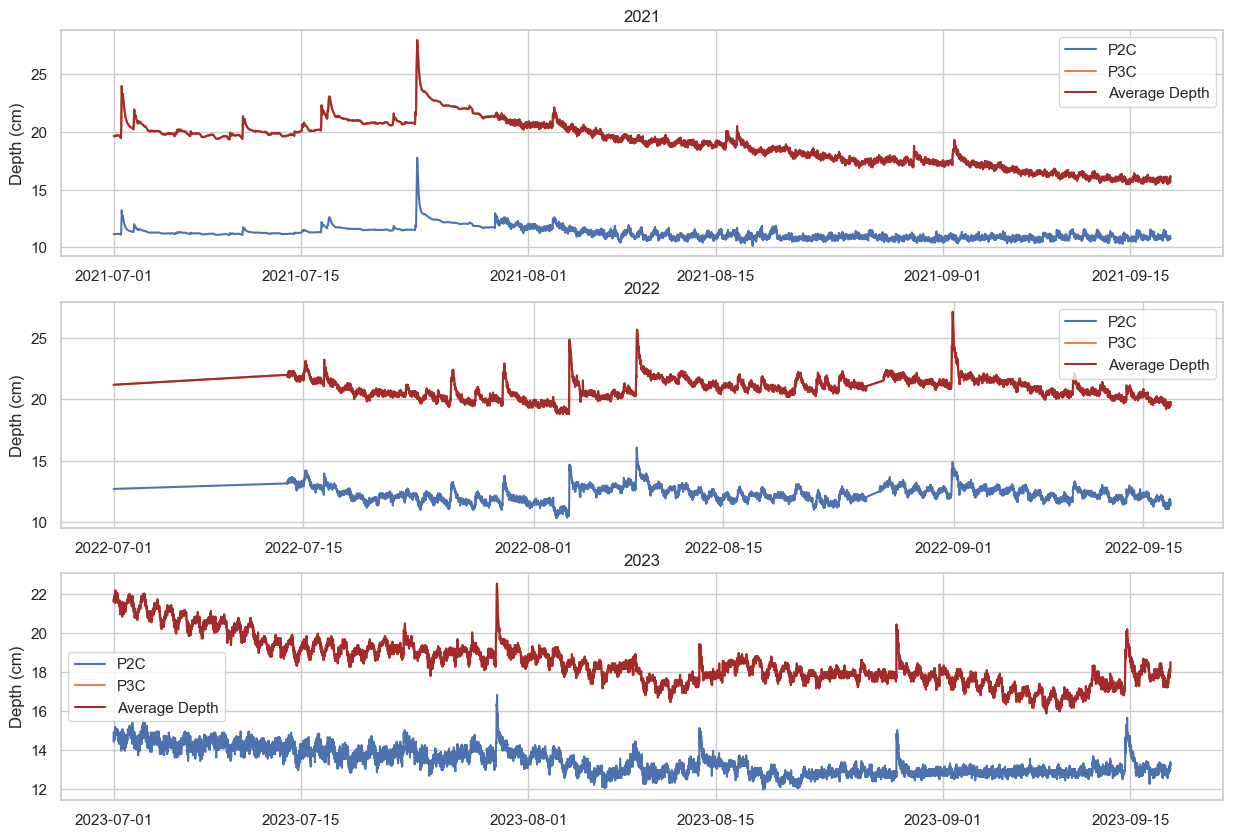

In [13]:
# plot depth time series for each year 
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=False)
sns.set_theme(style="whitegrid")

# filter for summer months
summer2021 = WSE['WSE_2021'][WSE['WSE_2021'].index.month.isin([7, 8, 9])]
summer2022 = WSE['WSE_2022'][WSE['WSE_2022'].index.month.isin([7, 8, 9])]
summer2023 = WSE['WSE_2023'][WSE['WSE_2023'].index.month.isin([7, 8, 9])]

ax[0].plot(summer2021.index, summer2021['P2C_depth'], label='P2C')
ax[0].plot(summer2021.index, summer2021['P3C_depth'], label='P3C')
ax[0].plot(summer2021.index, summer2021['depth'], label='Average Depth', color='brown')
ax[0].set_title('2021')
ax[0].set_ylabel('Depth (cm)')
ax[0].legend()

ax[1].plot(summer2022.index, summer2022['P2C_depth'], label='P2C')
ax[1].plot(summer2022.index, summer2022['P3C_depth'], label='P3C')
ax[1].plot(summer2022.index, summer2022['depth'], label='Average Depth', color='brown')
ax[1].set_title('2022')
ax[1].set_ylabel('Depth (cm)')
ax[1].legend()

ax[2].plot(summer2023.index, summer2023['P2C_depth'], label='P2C')
ax[2].plot(summer2023.index, summer2023['P3C_depth'], label='P3C')
ax[2].plot(summer2023.index, summer2023['depth'], label='Average Depth', color='brown')
ax[2].set_title('2023')
ax[2].set_ylabel('Depth (cm)')
ax[2].legend()

plt.show()

In [14]:
# merge the dataframes on the index - need to make sure storms coincide with the year of the WSE data!
# downstream reach
storms['st1_down'] = storms['st1_down'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
sondes['st1_down_sonde'] = sondes['st1_down_sonde'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
storms['st2_down'] = storms['st2_down'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
sondes['st2_down_sonde'] = sondes['st2_down_sonde'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
storms['st3_down'] = storms['st3_down'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
sondes['st3_down_sonde'] = sondes['st3_down_sonde'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
storms['st4_down'] = storms['st4_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st4_down_sonde'] = sondes['st4_down_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st5_down'] = storms['st5_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st5_down_sonde'] = sondes['st5_down_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st6_down_sonde'] = sondes['st6_down_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st7_down'] = storms['st7_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
# upstream reach
storms['st1_up'] = storms['st1_up'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
sondes['st1_up_sonde'] = sondes['st1_up_sonde'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
storms['st4_up'] = storms['st4_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st4_up_sonde'] = sondes['st4_up_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st5_up'] = storms['st5_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st6_up'] = storms['st6_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st7_up'] = storms['st7_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
sondes['st7_up_sonde'] = sondes['st7_up_sonde'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')

In [15]:
# export all the dataframes to CSV files
for key, value in storms.items():
    value.to_csv(f'{storm_directory}/{key}.csv')

Printing the timing of the peaks

In [16]:
for storm_name, storm_data in storms.items():
    peak_time = storm_data['depth'].idxmax()
    print(f"The peak water depth for {storm_name} occurred at {peak_time} and was {storm_data['depth'].max()} cm")

The peak water depth for st1_down occurred at 2021-07-23 16:40:00 and was 27.840833333357295 cm
The peak water depth for st1_up occurred at 2021-07-23 16:58:00 and was 27.698073333385764 cm
The peak water depth for st2_down occurred at 2022-08-03 15:17:00 and was 24.840880000010657 cm
The peak water depth for st3_down occurred at 2022-08-08 15:23:00 and was 25.649020000037126 cm
The peak water depth for st4_down occurred at 2023-07-29 15:37:00 and was 22.45866666667098 cm
The peak water depth for st4_up occurred at 2023-07-29 15:31:00 and was 22.502666666696314 cm
The peak water depth for st5_down occurred at 2023-08-13 18:45:00 and was 19.420000000036453 cm
The peak water depth for st5_up occurred at 2023-08-13 18:45:00 and was 19.420000000036453 cm
The peak water depth for st6_up occurred at 2023-08-28 12:20:00 and was 20.380000000022847 cm
The peak water depth for st7_down occurred at 2023-09-14 18:07:00 and was 20.128666666687423 cm
The peak water depth for st7_up occurred at 2023-

peak SS values

In [17]:
for storm_name, storm_data in storms.items():
    peak_time = storm_data['depth'].idxmax()
    print(f"The peak SS concentration for {storm_name} occurred at {peak_time} and was {storm_data['SS (uL/L)'].max()} uL/L")

The peak SS concentration for st1_down occurred at 2021-07-23 16:40:00 and was 457.12 uL/L
The peak SS concentration for st1_up occurred at 2021-07-23 16:58:00 and was 403.515 uL/L
The peak SS concentration for st2_down occurred at 2022-08-03 15:17:00 and was 206.82 uL/L
The peak SS concentration for st3_down occurred at 2022-08-08 15:23:00 and was 204.03 uL/L
The peak SS concentration for st4_down occurred at 2023-07-29 15:37:00 and was 271.06 uL/L
The peak SS concentration for st4_up occurred at 2023-07-29 15:31:00 and was 327.453 uL/L
The peak SS concentration for st5_down occurred at 2023-08-13 18:45:00 and was 210.458 uL/L
The peak SS concentration for st5_up occurred at 2023-08-13 18:45:00 and was 183.808 uL/L
The peak SS concentration for st6_up occurred at 2023-08-28 12:20:00 and was 232.052 uL/L
The peak SS concentration for st7_down occurred at 2023-09-14 18:07:00 and was 82.6 uL/L
The peak SS concentration for st7_up occurred at 2023-09-14 18:00:00 and was 95.963 uL/L


peak POC values

In [18]:
for storm_name, storm_data in storms.items():
    peak_time = storm_data['depth'].idxmax()
    print(f"The peak POC concentration for {storm_name} occurred at {peak_time} and was {storm_data['POC (mg/L)'].max()} mg/L")

The peak POC concentration for st1_down occurred at 2021-07-23 16:40:00 and was 51.66 mg/L
The peak POC concentration for st1_up occurred at 2021-07-23 16:58:00 and was 41.27935076 mg/L
The peak POC concentration for st2_down occurred at 2022-08-03 15:17:00 and was 6.784 mg/L
The peak POC concentration for st3_down occurred at 2022-08-08 15:23:00 and was 5.365 mg/L
The peak POC concentration for st4_down occurred at 2023-07-29 15:37:00 and was 29.943 mg/L
The peak POC concentration for st4_up occurred at 2023-07-29 15:31:00 and was 13.905 mg/L
The peak POC concentration for st5_down occurred at 2023-08-13 18:45:00 and was 7.778 mg/L
The peak POC concentration for st5_up occurred at 2023-08-13 18:45:00 and was 5.555 mg/L
The peak POC concentration for st6_up occurred at 2023-08-28 12:20:00 and was 12.67 mg/L
The peak POC concentration for st7_down occurred at 2023-09-14 18:07:00 and was 5.339 mg/L
The peak POC concentration for st7_up occurred at 2023-09-14 18:00:00 and was 5.137 mg/L


peak DOC values 

In [19]:
for storm_name, storm_data in storms.items():
    peak_time = storm_data['depth'].idxmax()
    print(f"The peak DOC concentration for {storm_name} occurred at {peak_time} and was {storm_data['DOC (mg/L)'].max()} mg/L")

The peak DOC concentration for st1_down occurred at 2021-07-23 16:40:00 and was 13.39 mg/L
The peak DOC concentration for st1_up occurred at 2021-07-23 16:58:00 and was 13.108 mg/L
The peak DOC concentration for st2_down occurred at 2022-08-03 15:17:00 and was 8.691 mg/L
The peak DOC concentration for st3_down occurred at 2022-08-08 15:23:00 and was 8.605 mg/L
The peak DOC concentration for st4_down occurred at 2023-07-29 15:37:00 and was 5.15 mg/L
The peak DOC concentration for st4_up occurred at 2023-07-29 15:31:00 and was 5.252 mg/L
The peak DOC concentration for st5_down occurred at 2023-08-13 18:45:00 and was 4.473 mg/L
The peak DOC concentration for st5_up occurred at 2023-08-13 18:45:00 and was 9.9 mg/L
The peak DOC concentration for st6_up occurred at 2023-08-28 12:20:00 and was 4.278 mg/L
The peak DOC concentration for st7_down occurred at 2023-09-14 18:07:00 and was 8.729 mg/L
The peak DOC concentration for st7_up occurred at 2023-09-14 18:00:00 and was 8.705 mg/L


Defining Functions - These are the functions I am going to be calling to plot my hysteresis patters

In [20]:
def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    # Ensure z is a 1D array with the same length as x and y
    if z is None:
        z = np.arange(len(x))  # Use the index of the point as the color
    elif not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z] * len(x))
    else:
        z = np.asarray(z)

    # Remove NaN values
    mask = ~np.isnan(y)
    x, y = x[mask], y[mask]

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    ax = plt.gca()
    ax.add_collection(lc)
    return lc

##### FUNCTIONS FOR LANGOIS 2005 METHOD #####
def trapz2(y0, x0):
    """
    Calculate the area under the curve using the trapezoidal rule.
    """
    # check if x0 contains date-time values
    if pd.api.types.is_datetime64_any_dtype(x0):
        # convert date-time to numerical values (e.g., seconds since epoch)
        x0_numeric = pd.to_datetime(x0).astype(int) / 10**9  # convert to seconds
    else:
        x0_numeric = x0
    
    sub_area = []
    for i in range(len(x0_numeric) - 1):
        xpair = x0_numeric[i:i+2]
        ypair = y0[i:i+2]
        tempCalc1 = np.trapz(ypair, xpair)
        tempCalc1 = np.abs(tempCalc1)
        sub_area = np.append(sub_area, tempCalc1)
    return np.sum(sub_area)

def langois_HI(SSC, depth, time):
    """
    Calculate the Langois Hysteresis Index (HI) for a given sediment concentration (SSC) and discharge (Q) time series.
    """
    # determine rising and falling limbs
    peak_idx = np.argmax(depth)  # index of max discharge
    # include the peak discharge in both rising and falling limbs
    rising_mask = np.arange(len(depth)) <= peak_idx  # rising limb includes everything up to and including the peak
    falling_mask = np.arange(len(depth)) >= peak_idx  # falling limb includes everything starting from the peak

    depth_rising, SSC_rising, time_rising = depth[rising_mask], SSC[rising_mask], time[rising_mask]
    depth_falling, SSC_falling, time_falling = depth[falling_mask], SSC[falling_mask], time[falling_mask]

    # calculate the areas 
    area_rising = trapz2((SSC_rising), time_rising)
    area_falling = trapz2((SSC_falling), time_falling)

    # calculate hysteresis index
    HI = area_rising / area_falling

    ## Plotting ##
    plt.figure(figsize=(8, 6))
    # Plot actual SSC for rising and falling limbs
    plt.scatter(time_rising, SSC_rising, color='blue', label='Actual Rising SSC', alpha=0.7)
    plt.scatter(time_falling, SSC_falling, color='red', label='Actual Falling SSC', alpha=0.7)
    # Highlight the areas under the curve using fill_between
    plt.fill_between(time_rising, SSC_rising, color='blue', alpha=0.3, label='Area Under Rising Limb')
    plt.fill_between(time_falling, SSC_falling, color='red', alpha=0.3, label='Area Under Falling Limb')
    plt.xlabel("Time")
    plt.ylabel("SSC")
    # Plot water depth in another axis
    plt.legend()
    ax2 = plt.gca().twinx()
    plt.plot(time, depth, color='green', label='Water Depth', alpha=0.7)
    plt.ylabel("Water Depth", color='green')
    # Labels and legend

    plt.title("Time Series with Area Under the Curves - Langlois (2005)")
    #plt.legend()
    plt.grid(False)
    # Show the plot
    plt.show()
    return HI

##### FUNCTIONS FOR AICH 2014 METHOD #####
def normalize_data(Q, SSC):
    Qn = Q / np.max(Q)  
    SSCn = SSC / np.max(SSC) 
    return Qn, SSCn

def find_rising_falling_limb(Qn, SSCn):
    Qmax_idx = np.argmax(Qn)  # find the index of the maximum discharge (Qmax)

    # rising limb: including Qmax
    rising_Qn = Qn[:Qmax_idx+1]
    rising_SSCn = SSCn[:Qmax_idx+1]
    # falling limb: excluding Qmax
    falling_Qn = Qn[Qmax_idx:]
    falling_SSCn = SSCn[Qmax_idx:]
    return rising_Qn, rising_SSCn, falling_Qn, falling_SSCn

def distance_from_line(x, y, m, b):
    return np.abs(m * x - y + b) / np.sqrt(m**2 + 1)

def get_projection(x0, y0, m, b):
    x_proj = (x0 + m * (y0 - b)) / (1 + m**2)
    y_proj = m * x_proj + b
    return x_proj, y_proj

def check_rising_sign(x0, y0, m, b):
    C = y0 - (m * x0 + b)  # Compute signed distance
    if C >= 0:
        sign = 1
    else:
        sign =-1
    return sign

def check_falling_sign(x0, y0, m, b):
    C = y0 - (m * x0 + b)  # Compute signed distance
    if C >= 0:
        sign = -1
    else:
        sign = 1
    return sign


def aich_HI(SSC, depth, xlim=(0,1), ylim=(0,1)):
    """
    Calculate the Aich Hysteresis Index (HI) for a given sediment concentration (SSC) and discharge (Q) time series.
    Also plot the hysteresis loop and the reference line used to calculate the HI.
    """

    SSC = np.array(SSC)
    Q = np.array(depth)
    # normalize discharge and SSC
    Qn, SSCn = normalize_data(Q, SSC)
    # find the rising and falling limbs
    rising_Qn, rising_SSCn, falling_Qn, falling_SSCn = find_rising_falling_limb(Qn, SSCn)

    # interpolate to get expected values along the rising and falling limbs
    rising_SSC_interp = np.interp(Qn, rising_Qn, rising_SSCn)
    falling_SSC_interp = np.interp(Qn, falling_Qn, falling_SSCn)
    Qmax = np.max(Qn)

    # Reference line from Qmax to the last point of the loop
    reference_line_x = [Qmax, Qn[-1]]  # X-coordinates (discharge)
    reference_line_y = [SSCn[np.argmax(Qn == Qmax)], SSCn[-1]]  # Y-coordinates (SSC)

    # Calculate the slope (m) and intercept (b) of the reference line
    m = (reference_line_y[1] - reference_line_y[0]) / (reference_line_x[1] - reference_line_x[0])
    b = reference_line_y[0] - m * reference_line_x[0]

    # Calculate perpendicular distances from each point in rising and falling limbs to the reference line
    Drise = [distance_from_line(rise_x, rise_y, m, b) for rise_x, rise_y in zip(rising_Qn[1:-1], rising_SSCn[1:-1])]
    Dfall = [distance_from_line(fall_x, fall_y, m, b) for fall_x, fall_y in zip(falling_Qn[1:-1], falling_SSCn[1:-1])]

    Drise_max = np.max(Drise)
    Dfall_max = np.max(Dfall)

    Drise_Qn = rising_Qn[1:-1][Drise == Drise_max]
    Drise_SSCn = rising_SSCn[1:-1][Drise == Drise_max]

    Dfall_Qn = falling_Qn[1:-1][Dfall == Dfall_max]
    Dfall_SSCn = falling_SSCn[1:-1][Dfall == Dfall_max]

    Drise_xproj, Drise_yproj = get_projection(Drise_Qn, Drise_SSCn, m, b)
    Dfall_xproj, Dfall_yproj = get_projection(Dfall_Qn, Dfall_SSCn, m, b)

    Drise_distance = check_rising_sign(np.array(Drise_Qn), np.array(Drise_SSCn), m, b)*Drise_max
    Dfall_distance = check_falling_sign(np.array(Dfall_Qn), np.array(Dfall_SSCn), m, b)*Dfall_max
    
    HI = Drise_distance + Dfall_distance

    ## Plotting ## 
    # Plot the hysteresis loop
    plt.figure(figsize=(6, 6))
    plt.plot(Qn, SSCn, color='b')
    # Plot the rising and falling limbs
    plt.plot(rising_Qn, rising_SSCn, label='Rising Limb', color='g')
    plt.plot(falling_Qn, falling_SSCn, label='Falling Limb', color='r')
    # Plot the reference line
    #plt.plot(reference_line_x, reference_line_y, '--k', label='Reference Line (Qmax to Last Sample)')
    tempCalc1 = np.linspace(0.8, 1.25, 100)
    plt.plot(tempCalc1, m*tempCalc1 + b, '--k', label='Reference Line (Qmax to Last Sample)')
    # Mark the Drise and Dfall distances
    plt.plot(np.array([]), np.array([]), color="lightgreen")

    # Plotting rising max
    plt.scatter(Drise_Qn, Drise_SSCn, color="green")
    plt.plot([Drise_Qn, Drise_xproj], [Drise_SSCn, Drise_yproj], 'g--', label="D rising")

    # Plotting falling max
    plt.scatter(Dfall_Qn, Dfall_SSCn, color="red")
    plt.plot([Dfall_Qn, Dfall_xproj], [Dfall_SSCn, Dfall_yproj], 'r--', label="D falling")

    plt.xlabel('Normalized Discharge (Qn)')
    plt.ylabel('Normalized SSC (SSCn)')
    plt.title('Hysteresis Loop with Reference Line and Distances - Aich (2014)')
    plt.legend()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.show()

    return HI

# Storm Hysteresis Plots

Storm 1 - Downstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_SS_uL_L.jpg


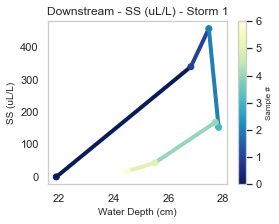

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_SRP_mg_L.jpg


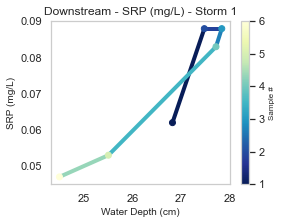

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_TP_mg_L.jpg


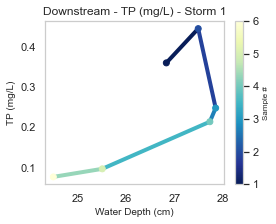

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_DOC_mg_L.jpg


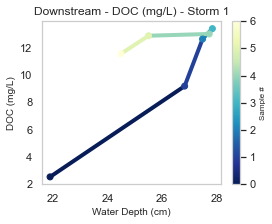

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_POC_mg_L.jpg


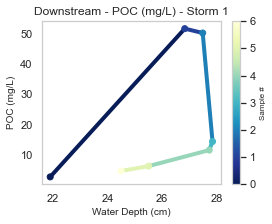

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_PP_mg_L.jpg


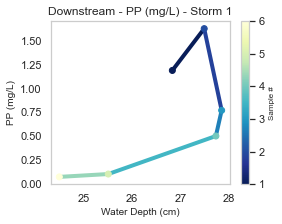

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_fDOM.jpg


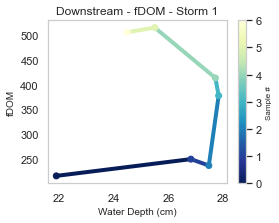

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_Turbidity.jpg


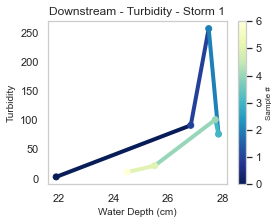

In [207]:
# single plot - downstream reach - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_down']['depth']))
    num_points = len(storms['st1_down']['depth'])
    colorline(storms['st1_down']['depth'], storms['st1_down'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_down']['depth'], storms['st1_down'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # Close the figure to free up memory

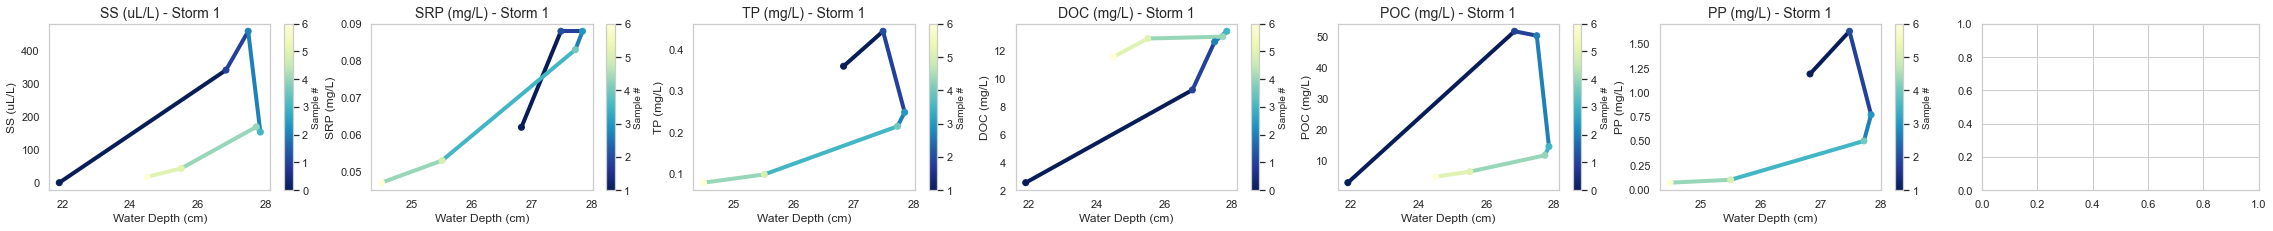

In [208]:
# All constituents - downstream - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st1_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(storms['st1_down']['depth']))
    num_points = len(storms['st1_down']['depth'])
    colorline(storms['st1_down']['depth'], storms['st1_down'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_down']['depth'], storms['st1_down'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 1', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=2000)
plt.show()

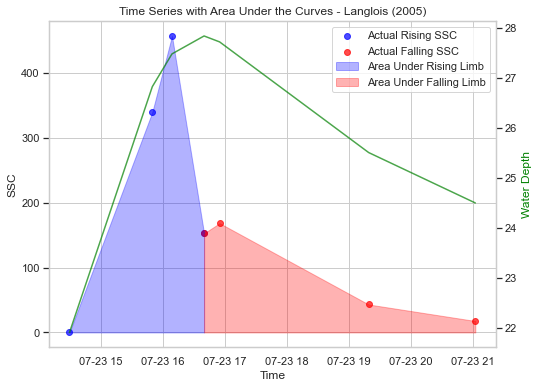

Langois Hysteresis Index for SS: 1.47343693160284


In [209]:
# langois_HI - downstream - storm 1
SS_HI_langois = langois_HI(storms['st1_down']['SS (uL/L)'], storms['st1_down']['depth'], storms['st1_down'].index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

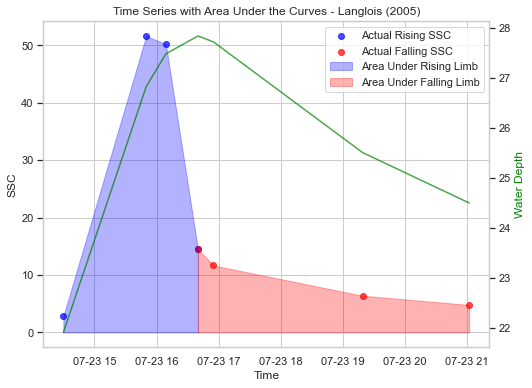

Langois Hysteresis Index for POC: 1.9994269535526592


In [210]:
POC_HI_langois = langois_HI(storms['st1_down']['POC (mg/L)'], storms['st1_down']['depth'], storms['st1_down'].index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

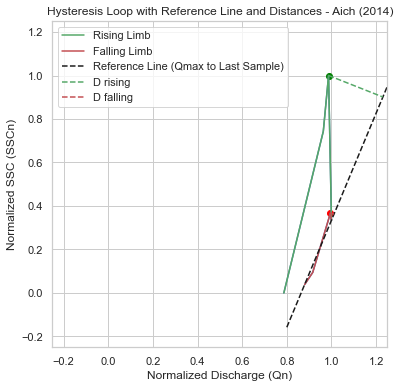

Aich Hysteresis Index for SS: 0.24576980515425828


In [211]:
SS_HI_aich = aich_HI(storms['st1_down']['SS (uL/L)'], storms['st1_down']['depth'], xlim=(-0.25, 1.25), ylim=(-0.25, 1.25))
print(f"Aich Hysteresis Index for SS: {SS_HI_aich}")

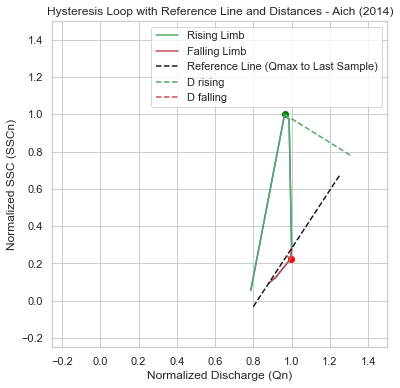

Aich Hysteresis Index for POC: 0.4442396437428794


In [212]:
POC_HI_aich = aich_HI(storms['st1_down']['POC (mg/L)'], storms['st1_down']['depth'], xlim=(-0.25, 1.5), ylim=(-0.25, 1.5))
print(f"Aich Hysteresis Index for POC: {POC_HI_aich}")

Storm 1 - Upstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_SS_uL_L.jpg


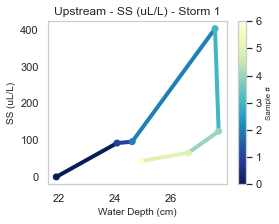

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_SRP_mg_L.jpg


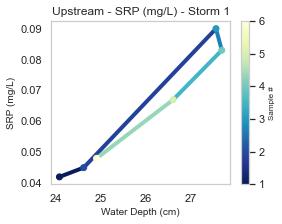

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_TP_mg_L.jpg


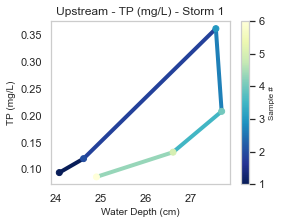

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_DOC_mg_L.jpg


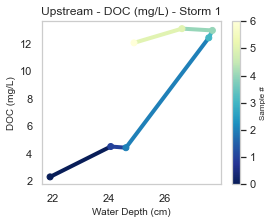

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_POC_mg_L.jpg


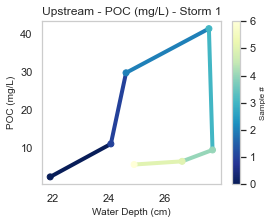

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_PP_mg_L.jpg


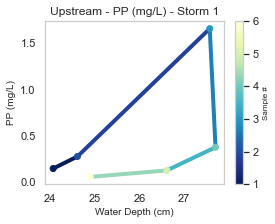

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_fDOM.jpg


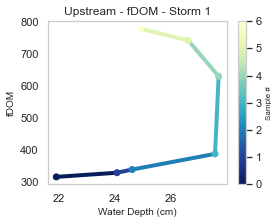

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_Turbidity.jpg


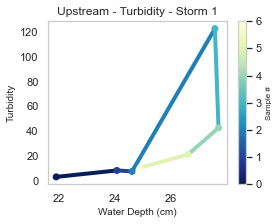

In [213]:
# single plot - upstream reach - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['depth']))
    num_points = len(storms['st1_up']['depth'])
    colorline(storms['st1_up']['depth'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['depth'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

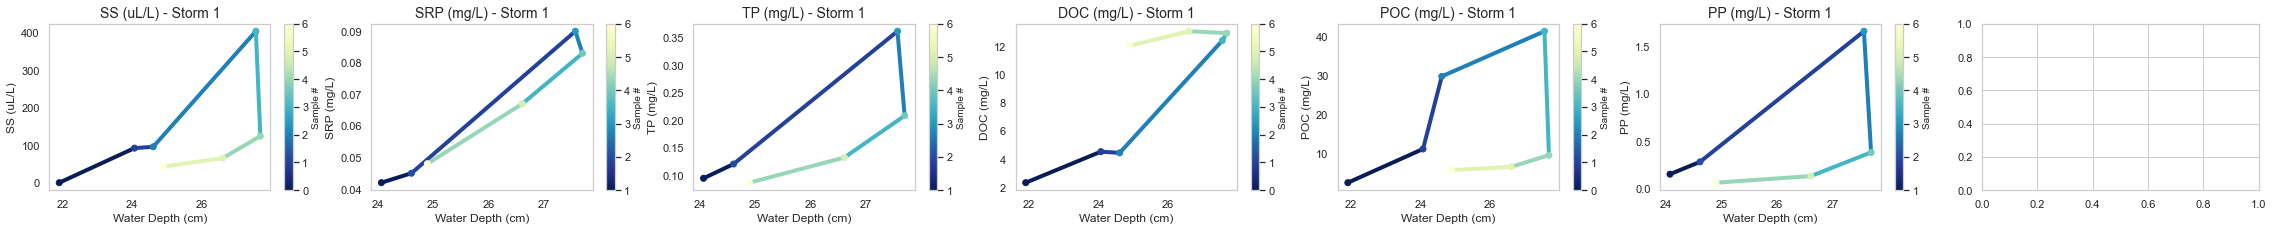

In [214]:
# All constituents - downstream - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st1_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['depth']))
    num_points = len(storms['st1_up']['depth'])
    colorline(storms['st1_up']['depth'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['depth'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 1', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

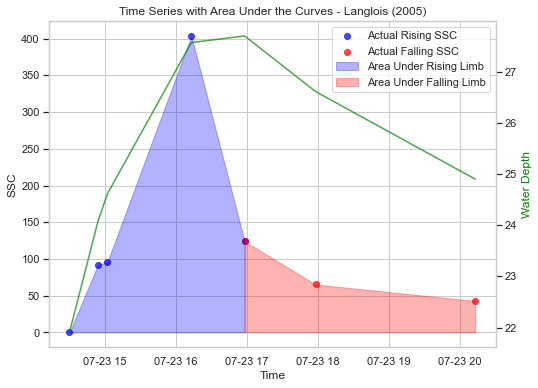

Langois Hysteresis Index for SS: 2.422452033347006


In [215]:
# langois_HI - downstream - storm 1
SS_HI_langois = langois_HI(storms['st1_up']['SS (uL/L)'], storms['st1_up']['depth'], storms['st1_up'].index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

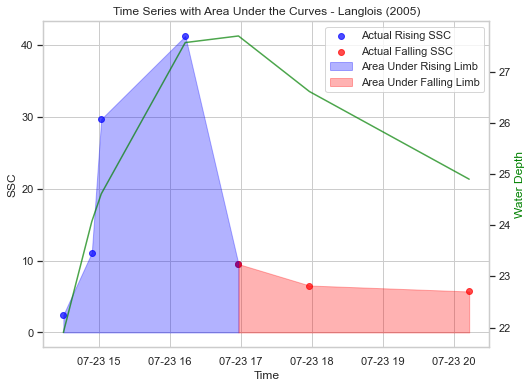

Langois Hysteresis Index for POC: 3.0488802240078985


In [216]:
# langois_HI - downstream - storm 1
POC_HI_langois = langois_HI(storms['st1_up']['POC (mg/L)'], storms['st1_up']['depth'], storms['st1_up'].index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

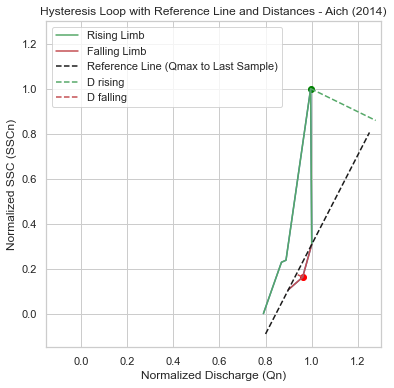

Aich Hysteresis Index for SS: 0.3453913637028516


In [217]:
SS_HI_aich = aich_HI(storms['st1_up']['SS (uL/L)'], storms['st1_up']['depth'], xlim=(-0.15, 1.3), ylim=(-0.15, 1.3))
print(f"Aich Hysteresis Index for SS: {SS_HI_aich}")

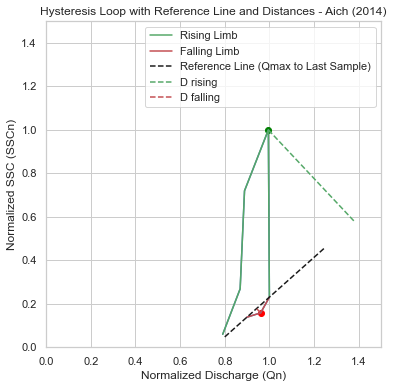

Aich Hysteresis Index for POC: 0.5976110339841294


In [218]:
POC_HI_aich = aich_HI(storms['st1_up']['POC (mg/L)'], storms['st1_up']['depth'], xlim=(0, 1.5), ylim=(0, 1.5))
print(f"Aich Hysteresis Index for POC: {POC_HI_aich}")

Storm 2 - Downstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_SS_uL_L.jpg


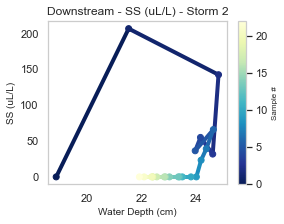

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_SRP_mg_L.jpg


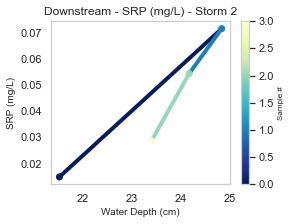

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_TP_mg_L.jpg


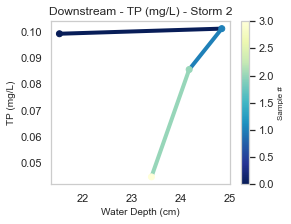

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_DOC_mg_L.jpg


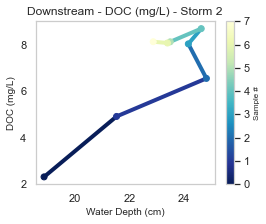

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_POC_mg_L.jpg


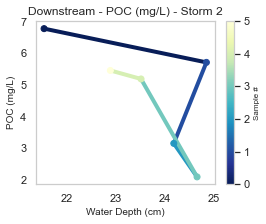

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_PP_mg_L.jpg


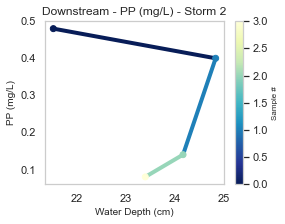

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_N_mg_L.jpg


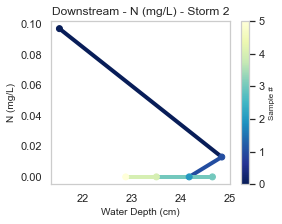

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_fDOM.jpg


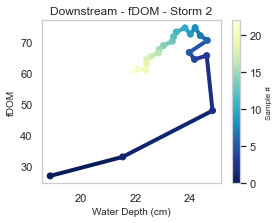

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_Turbidity.jpg


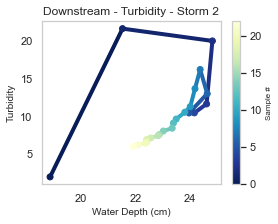

In [219]:
# single plot - downstream reach - storm 2
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st2_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st2_down'][constituent])
    x = storms['st2_down']['depth'][mask]
    y = storms['st2_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 2', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

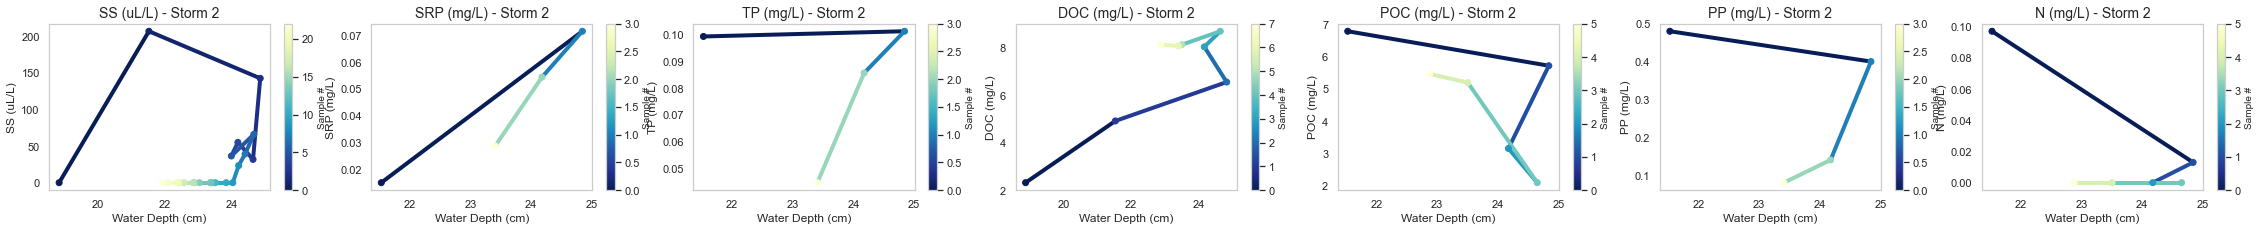

In [220]:
# All constituents - downstream - storm 2
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st2_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st2_down'][constituent])
    x = storms['st2_down']['depth'][mask]
    y = storms['st2_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 2', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

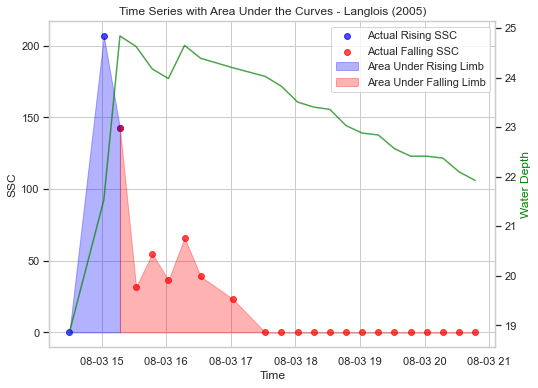

Langois Hysteresis Index for SS: 1.0800377059482498


In [221]:
SS_HI_langois = langois_HI(storms['st2_down']['SS (uL/L)'], storms['st2_down']['depth'], storms['st2_down'].index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

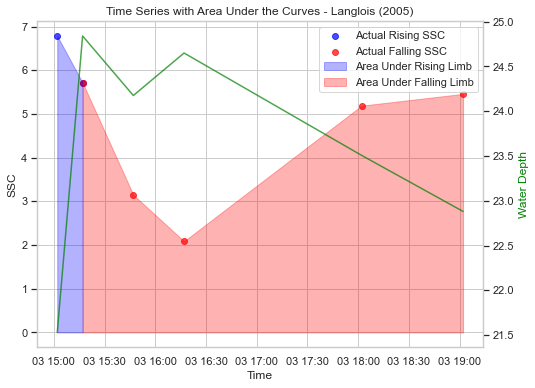

Langois Hysteresis Index for POC: 0.10266625049283741


In [222]:
TempCalc1 = storms['st2_down'].dropna(subset=['POC (mg/L)'])
POC_HI_langois = langois_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

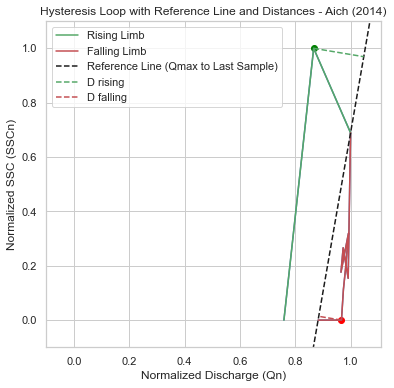

Aich Hysteresis Index for SS: 0.26695079084847495


In [223]:
SS_HI_aich = aich_HI(storms['st2_down']['SS (uL/L)'], storms['st2_down']['depth'], xlim=(-0.1, 1.11), ylim=(-0.1, 1.1))
print(f"Aich Hysteresis Index for SS: {SS_HI_aich}")

Storm 3 - Downstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_SS_uL_L.jpg


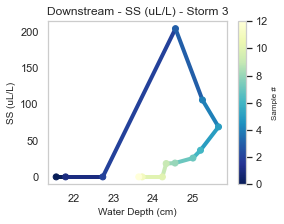

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_SRP_mg_L.jpg


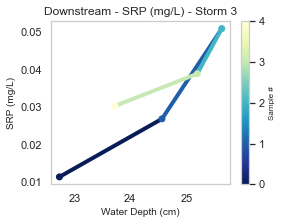

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_TP_mg_L.jpg


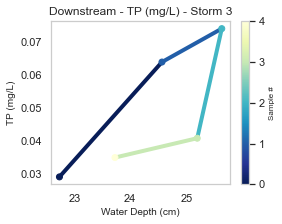

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_DOC_mg_L.jpg


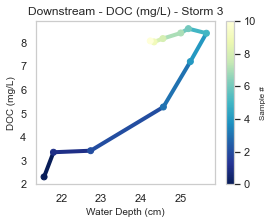

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_POC_mg_L.jpg


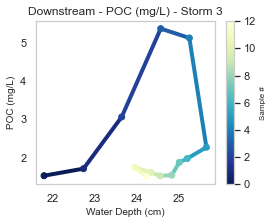

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_PP_mg_L.jpg


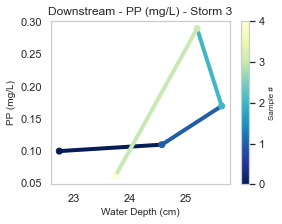

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_N_mg_L.jpg


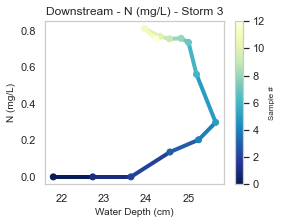

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_fDOM.jpg


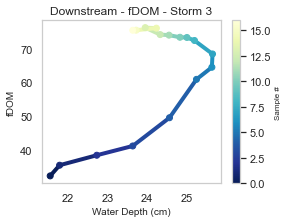

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_Turbidity.jpg


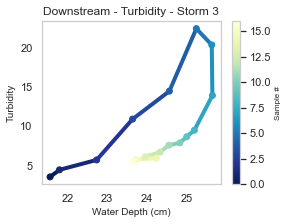

In [224]:
# single plot - downstream reach - storm 3
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st3_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st3_down'][constituent])
    x = storms['st3_down']['depth'][mask]
    y = storms['st3_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 3', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

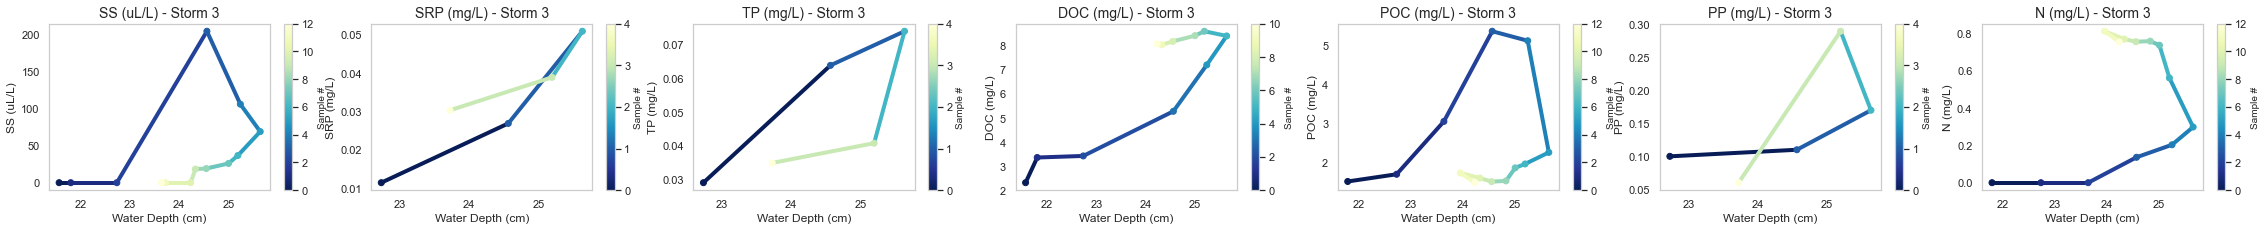

In [225]:
# All constituents - downstream - storm 3
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st3_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st3_down'][constituent])
    x = storms['st3_down']['depth'][mask]
    y = storms['st3_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 3', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

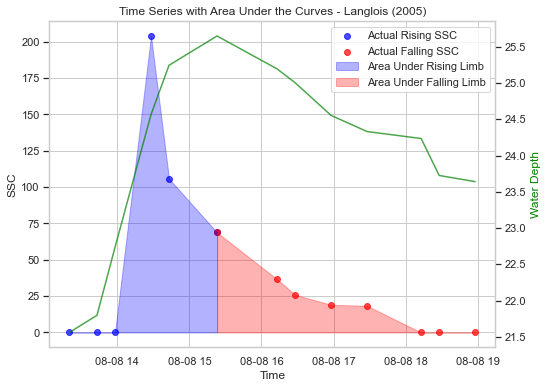

Langois Hysteresis Index for SS: 1.8666267093578965


In [226]:
TempCalc1 = storms['st3_down'].dropna(subset=['SS (uL/L)'])
SS_HI_langois = langois_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

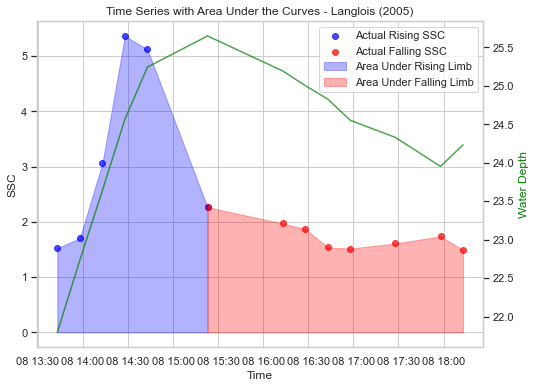

Langois Hysteresis Index for POC: 1.1469698088137594


In [227]:
TempCalc1 = storms['st3_down'].dropna(subset=['POC (mg/L)'])
POC_HI_langois = langois_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

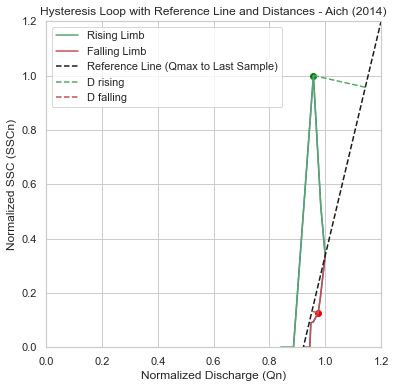

Aich Hysteresis Index for SS: 0.21417064870018362


In [228]:
TempCalc1 = storms['st3_down'].dropna(subset=['SS (uL/L)'])
SS_HI_aich = aich_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], xlim=(0, 1.2), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for SS: {SS_HI_aich}")

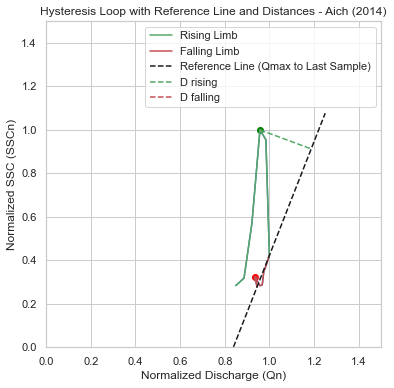

Aich Hysteresis Index for POC: 0.21892801612409937


In [229]:
TempCalc1 = storms['st3_down'].dropna(subset=['POC (mg/L)'])
POC_HI_aich = aich_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], xlim=(0, 1.5), ylim=(0, 1.5))
print(f"Aich Hysteresis Index for POC: {POC_HI_aich}")

Storm 4 - Downstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_SS_uL_L.jpg


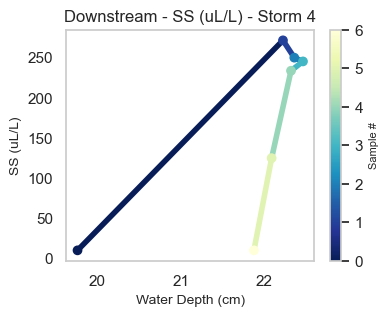

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_DOC_mg_L.jpg


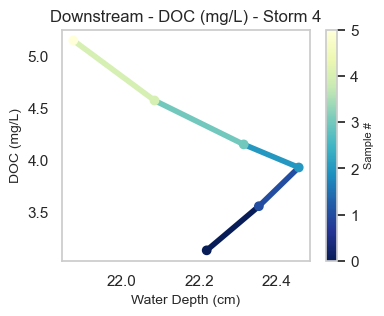

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_POC_mg_L.jpg


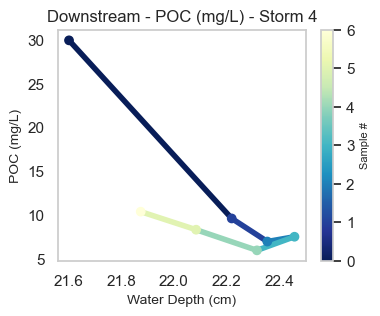

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_N_mg_L.jpg


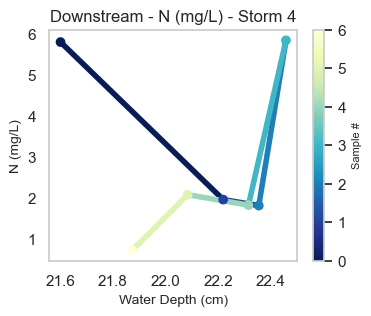

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_fDOM.jpg


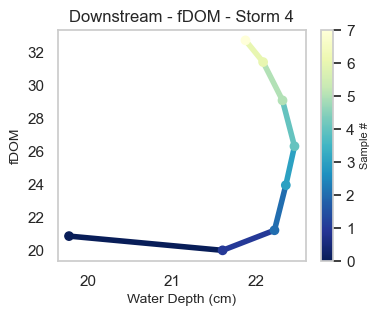

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_Turbidity.jpg


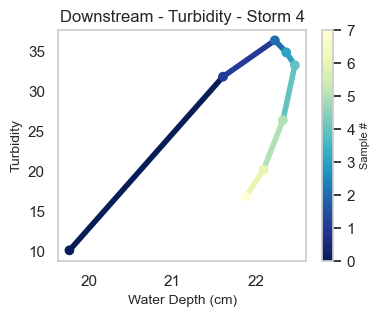

In [22]:
# single plot - downstream reach - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st4_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st4_down'][constituent])
    x = storms['st4_down']['depth'][mask]
    y = storms['st4_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 4', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_{safe_constituent}.jpg"
    print(filename)
    #plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

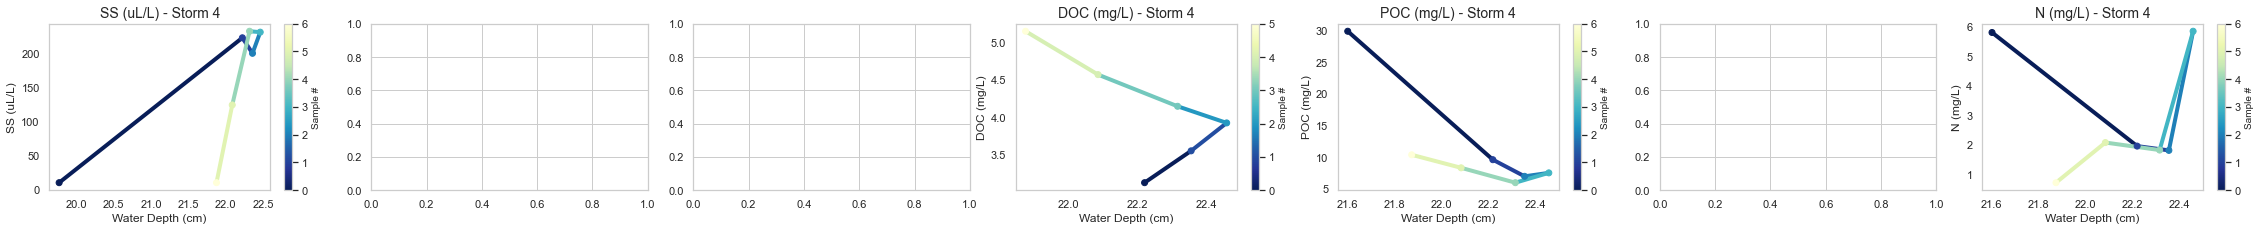

In [231]:
# All constituents - downstream - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st4_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st4_down'][constituent])
    x = storms['st4_down']['depth'][mask]
    y = storms['st4_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 4', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

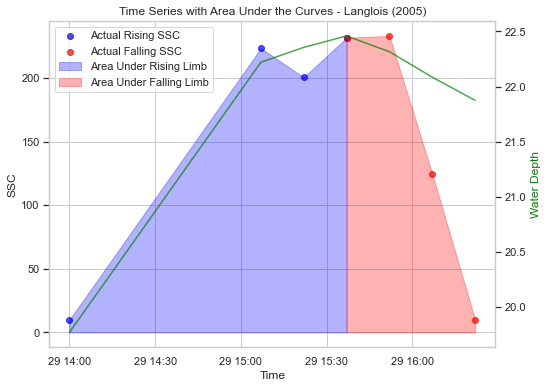

Langois Hysteresis Index for SS: 1.9843670381472627


In [232]:
TempCalc1 = storms['st4_down'].dropna(subset=['SS (uL/L)'])
SS_HI_langois = langois_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

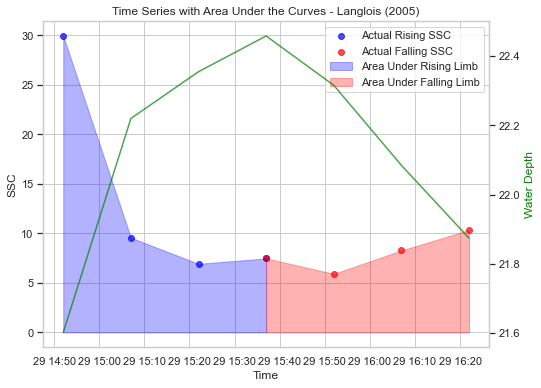

Langois Hysteresis Index for POC: 1.522895317161759


In [233]:
TempCalc1 = storms['st4_down'].dropna(subset=['POC (mg/L)'])
POC_HI_langois = langois_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

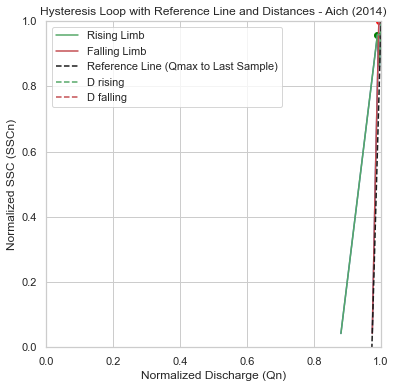

Aich Hysteresis Index for SS: 0.003143140882635359


In [234]:
TempCalc1 = storms['st4_down'].dropna(subset=['SS (uL/L)'])
SS_HI_aich = aich_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], xlim=(0, 1), ylim=(0, 1))
print(f"Aich Hysteresis Index for SS: {SS_HI_aich}")

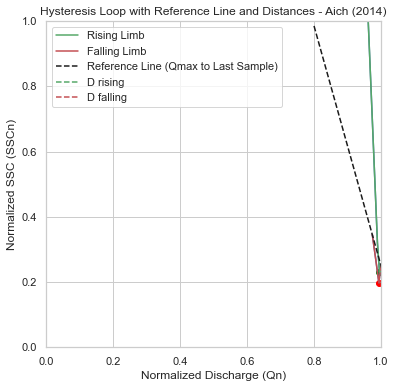

Aich Hysteresis Index for POC: 0.010525074223423475


In [235]:
TempCalc1 = storms['st4_down'].dropna(subset=['POC (mg/L)'])
POC_HI_aich = aich_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'])
print(f"Aich Hysteresis Index for POC: {POC_HI_aich}")

Storm 4 - Upstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_SS_uL_L.jpg


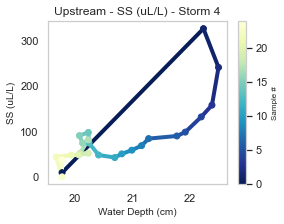

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_DOC_mg_L.jpg


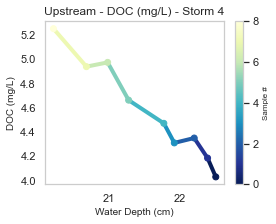

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_POC_mg_L.jpg


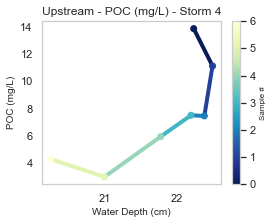

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_N_mg_L.jpg


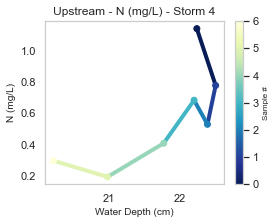

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_fDOM.jpg


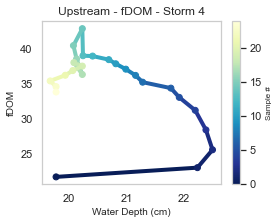

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_Turbidity.jpg


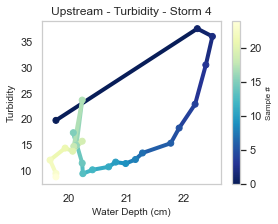

In [236]:
# single plot - upstream reach - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st4_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st4_up'][constituent])
    x = storms['st4_up']['depth'][mask]
    y = storms['st4_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 4', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

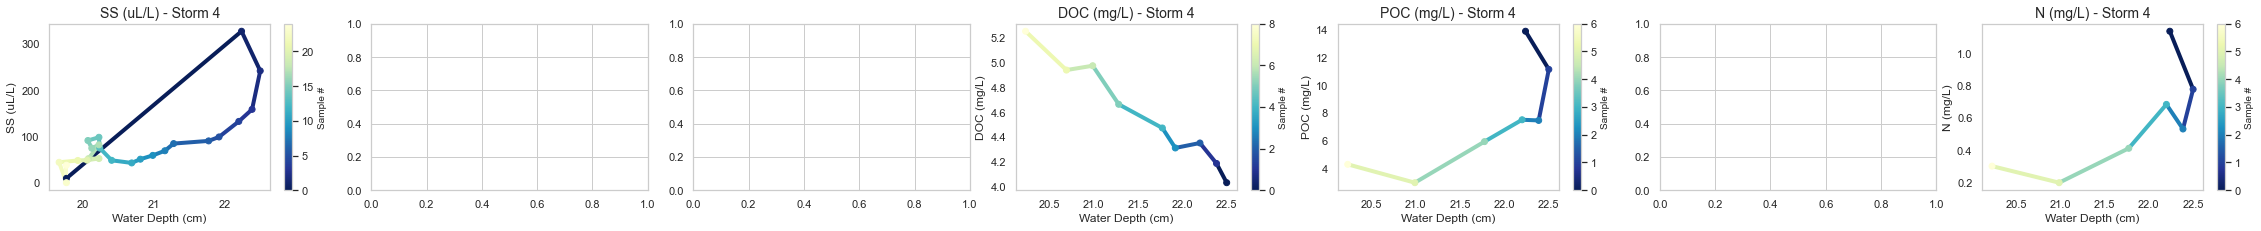

In [237]:
# All constituents - upstream - storm 4
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st4_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st4_up'][constituent])
    x = storms['st4_up']['depth'][mask]
    y = storms['st4_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 4', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

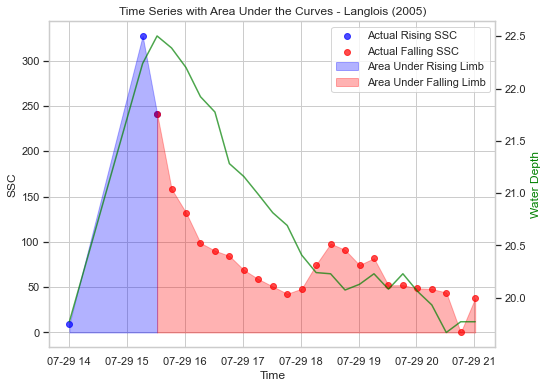

Langois Hysteresis Index for SS: 0.6936722262152457


In [238]:
TempCalc1 = storms['st4_up'].dropna(subset=['SS (uL/L)'])
SS_HI_langois = langois_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

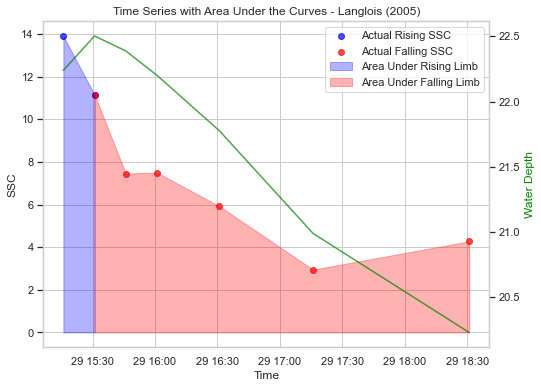

Langois Hysteresis Index for POC: 0.20348138280590033


In [239]:
TempCalc1 = storms['st4_up'].dropna(subset=['POC (mg/L)'])
POC_HI_langois = langois_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

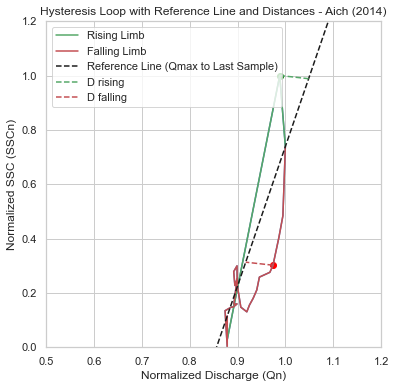

Aich Hysteresis Index for SS: 0.11964710822371236


In [240]:
TempCalc1 = storms['st4_up'].dropna(subset=['SS (uL/L)'])
SS_HI_aich = aich_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], xlim=(0.5, 1.2), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for SS: {SS_HI_aich}")

Storm 5 - Downstream

In [241]:
storms['st5_down']

SS (uL/L)  DOC (mg/L)  POC (mg/L)  N (mg/L)  LAB ID  \
Date_Time                                                                  
2023-08-13 18:30:00      4.460         NaN         NaN       NaN     NaN   
2023-08-13 18:45:00    210.458       4.473       7.778     1.035   456.0   
2023-08-13 18:58:00    116.066       3.936       4.535     0.865   457.0   
2023-08-13 19:02:00    113.258       3.943       5.889     1.832   458.0   
2023-08-13 19:10:00     81.150       4.039       4.804     0.835   459.0   
2023-08-13 21:02:00     56.150       2.786       2.921     0.234   460.0   

                       fDOM  Turbidity          P2C          P3C  P2C_depth  \
Date_Time                                                                     
2023-08-13 18:30:00  13.720      5.230  2723.141000  2724.163000  13.200000   
2023-08-13 18:45:00  26.750     22.840  2723.160243  2724.182200  15.124300   
2023-08-13 18:58:00  28.572     15.560  2723.159733  2724.179167  15.073253   
2023-08-13 19:02:00  28.868     13.776  2723.158800  2724.178700  14.979960   
2023-08-13 19:10:00  29.220     11.310  2723.155382  2724.178700  14.638200   
2023-08-13 21:02:00  22.616      8.756  2723.158105  2724.181300  14.910480   

                     P3C_depth      depth  
Date_Time                                  
2023-08-13 18:30:00  17.500000  17.500000  
2023-08-13 18:45:00  19.420000  19.420000  
2023-08-13 18:58:00  19.116667  19.116667  
2023-08-13 19:02:00  19.070000  19.070000  
2023-08-13 19:10:00  19.070000  19.070000  
2023-08-13 21:02:00  19.330000  19.330000

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_SS_uL_L.jpg


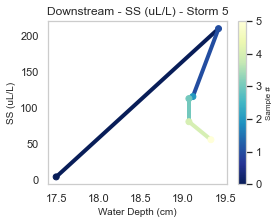

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_DOC_mg_L.jpg


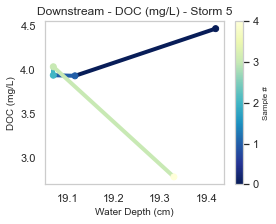

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_POC_mg_L.jpg


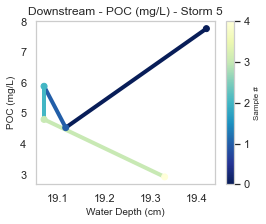

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_N_mg_L.jpg


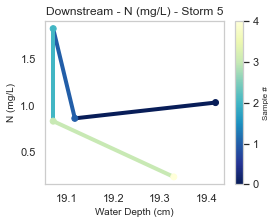

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_fDOM.jpg


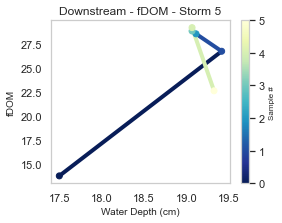

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_Turbidity.jpg


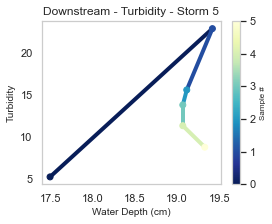

In [242]:
# single plot - downstream reach - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st5_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st5_down'][constituent])
    x = storms['st5_down']['depth'][mask]
    y = storms['st5_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 5', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

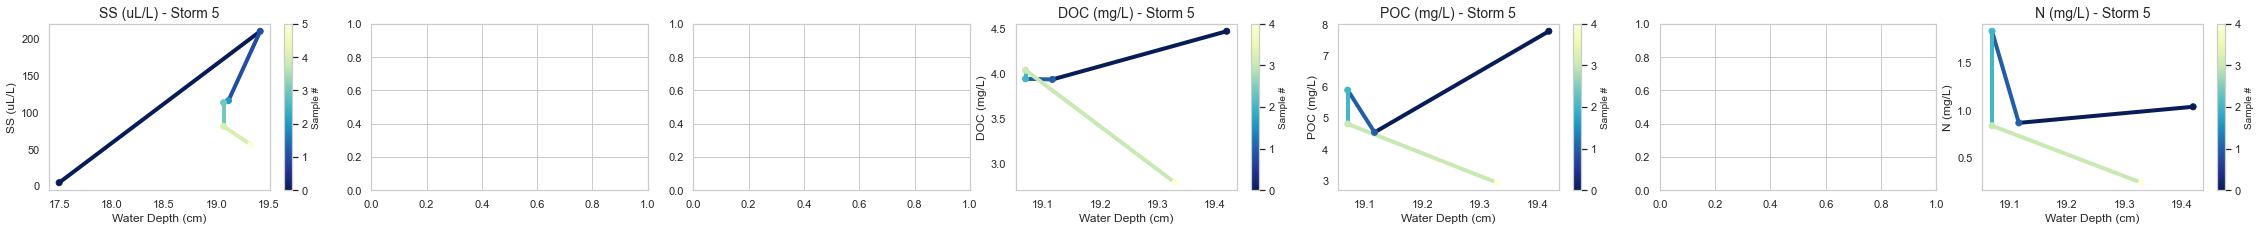

In [243]:
# All constituents - downstream - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st5_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st5_down'][constituent])
    x = storms['st5_down']['depth'][mask]
    y = storms['st5_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 5', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

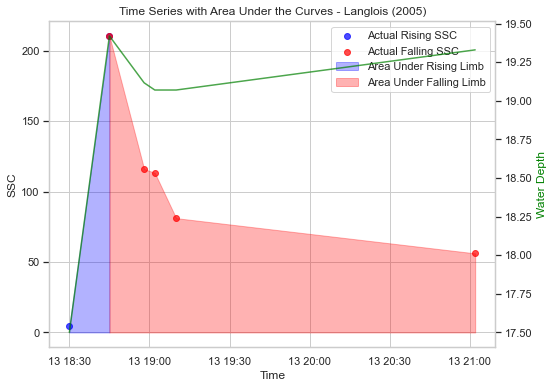

Langois Hysteresis Index for SS: 0.1459051407713936


In [244]:
TempCalc1 = storms['st5_down'].dropna(subset=['SS (uL/L)'])
SS_HI_langois = langois_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

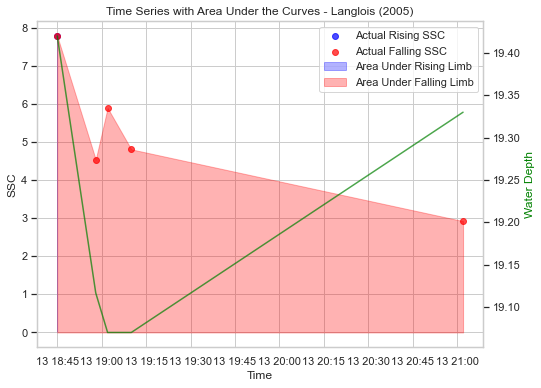

Langois Hysteresis Index for POC: 0.0


In [245]:
TempCalc1 = storms['st5_down'].dropna(subset=['POC (mg/L)'])
POC_HI_langois = langois_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

Storm 5 - Upstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_SS_uL_L.jpg


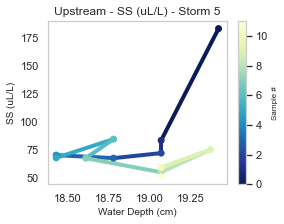

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_DOC_mg_L.jpg


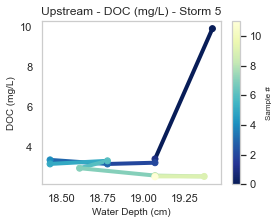

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_POC_mg_L.jpg


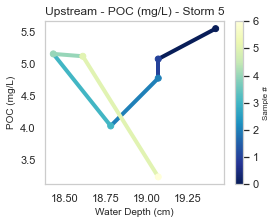

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_N_mg_L.jpg


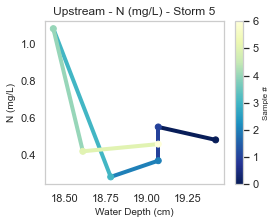

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_fDOM.jpg


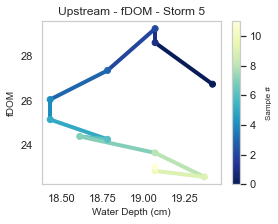

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_Turbidity.jpg


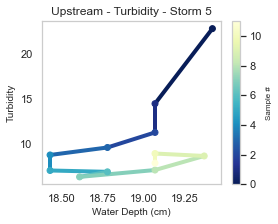

In [246]:
# single plot - upstream reach - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st5_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st5_up'][constituent])
    x = storms['st5_up']['depth'][mask]
    y = storms['st5_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 5', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

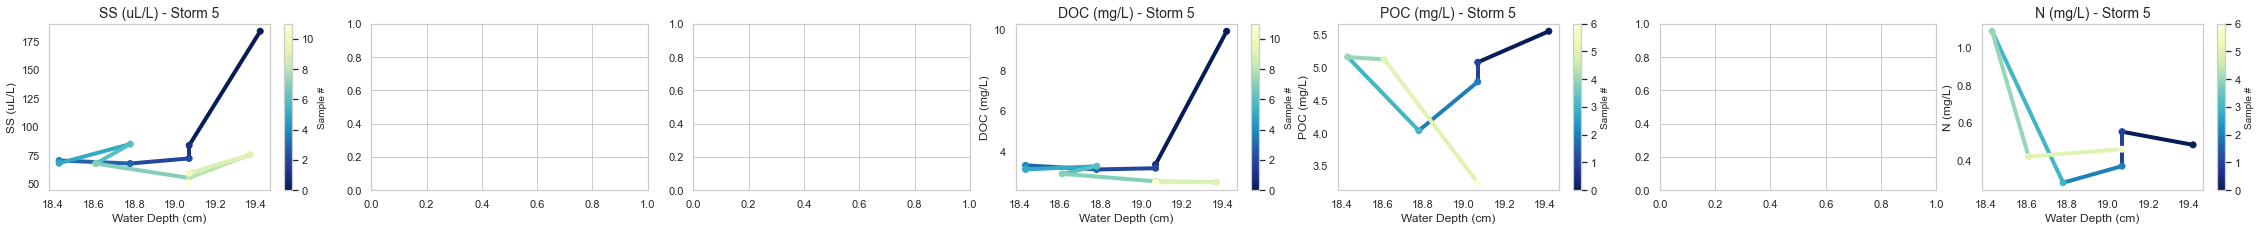

In [247]:
# All constituents - upstream - storm 5
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st5_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st5_up'][constituent])
    x = storms['st5_up']['depth'][mask]
    y = storms['st5_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 5', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

Storm 6 - Upstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_SS_uL_L.jpg


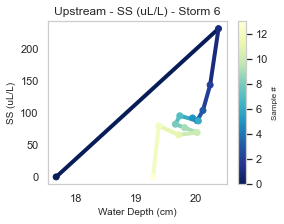

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_DOC_mg_L.jpg


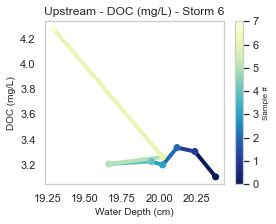

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_POC_mg_L.jpg


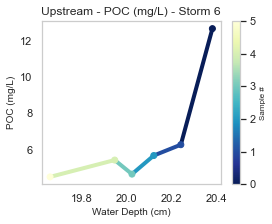

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_N_mg_L.jpg


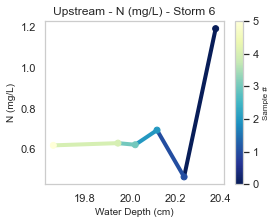

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_fDOM.jpg


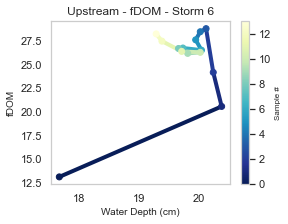

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_Turbidity.jpg


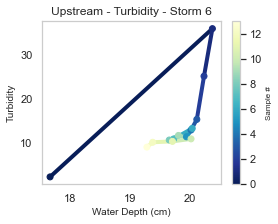

In [248]:
# single plot - upstream reach - storm 6
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st6_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st6_up'][constituent])
    x = storms['st6_up']['depth'][mask]
    y = storms['st6_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 6', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

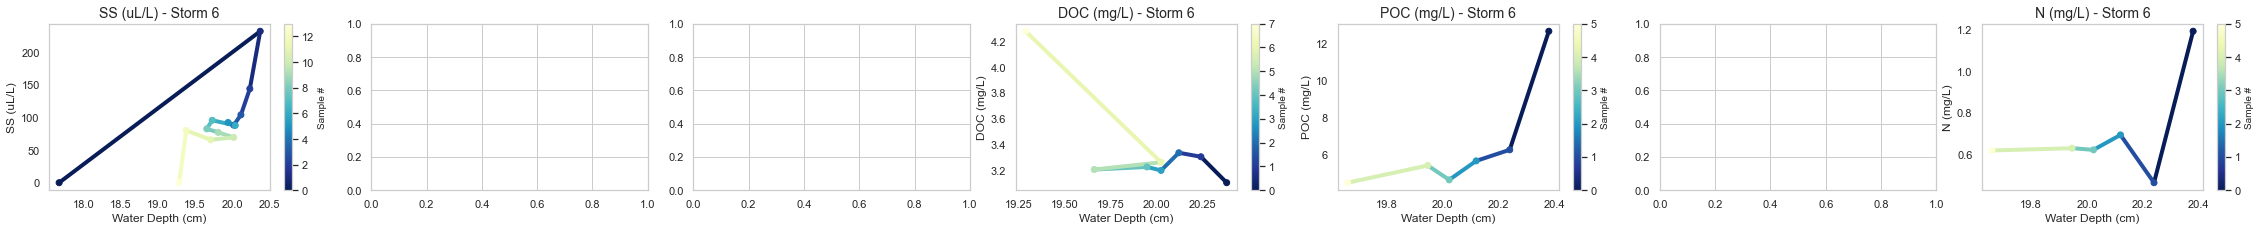

In [249]:
# All constituents - upstream - storm 6
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st6_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st6_up'][constituent])
    x = storms['st6_up']['depth'][mask]
    y = storms['st6_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 6', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

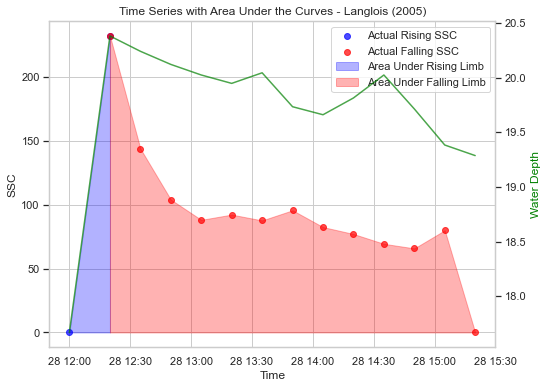

Langois Hysteresis Index for SS: 0.14033127086544125


In [250]:
TempCalc1 = storms['st6_up'].dropna(subset=['SS (uL/L)'])
SS_HI_langois = langois_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

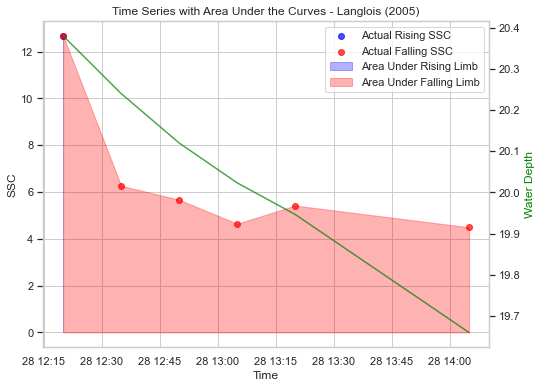

Langois Hysteresis Index for POC: 0.0


In [251]:
TempCalc1 = storms['st6_up'].dropna(subset=['POC (mg/L)'])
POC_HI_langois = langois_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

Storm 7 - Downstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_SS_uL_L.jpg


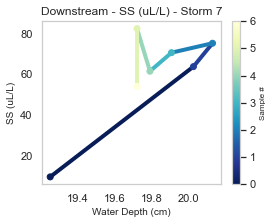

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_DOC_mg_L.jpg


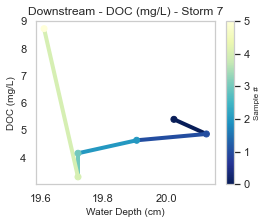

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_POC_mg_L.jpg


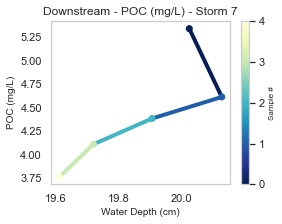

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_N_mg_L.jpg


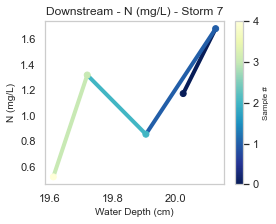

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_fDOM.jpg


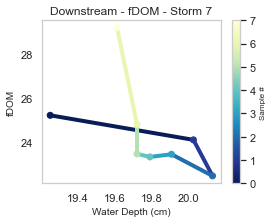

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_Turbidity.jpg


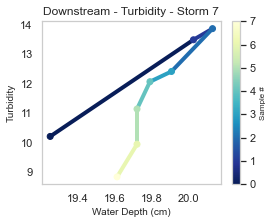

In [252]:
# single plot - downstream reach - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st7_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st7_down'][constituent])
    x = storms['st7_down']['depth'][mask]
    y = storms['st7_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 7', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

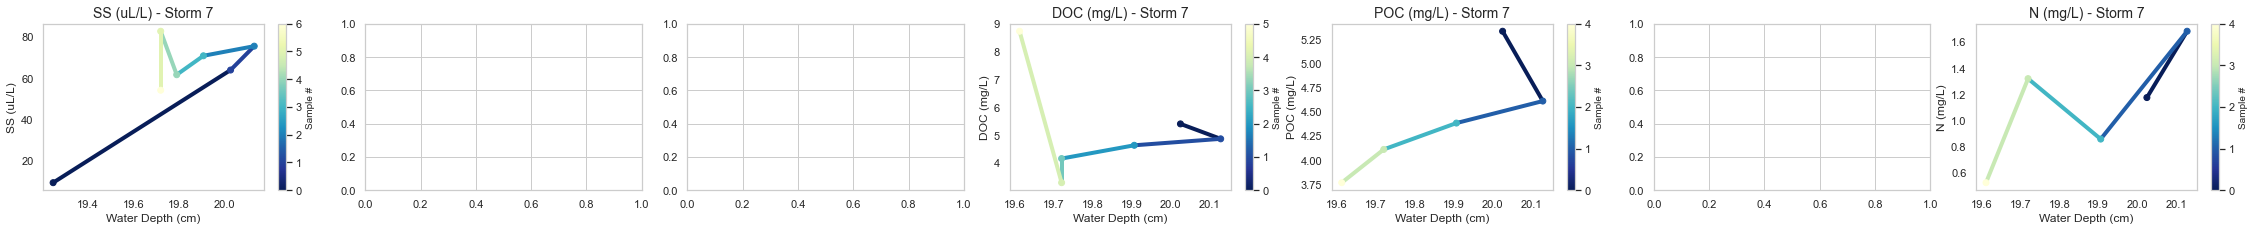

In [253]:
# All constituents - downstream - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st7_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st7_down'][constituent])
    x = storms['st7_down']['depth'][mask]
    y = storms['st7_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 7', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_down_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

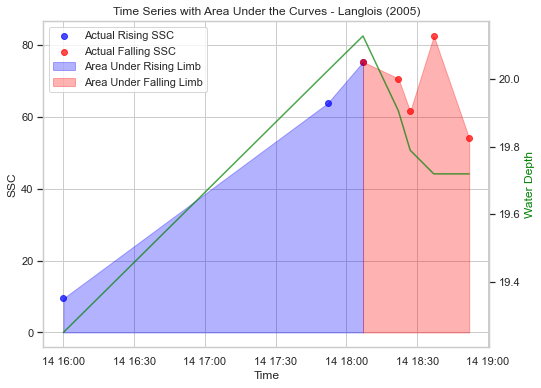

Langois Hysteresis Index for SS: 1.623672787716935


In [254]:
TempCalc1 = storms['st7_down'].dropna(subset=['SS (uL/L)'])
SS_HI_langois = langois_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

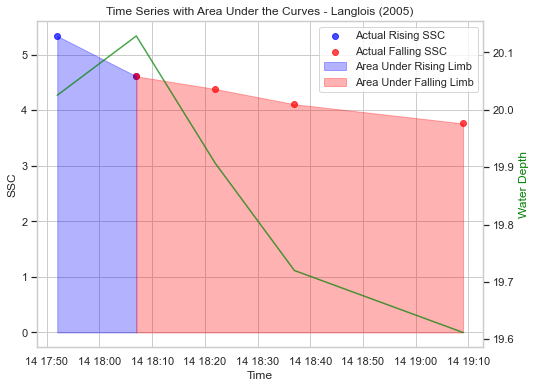

Langois Hysteresis Index for POC: 0.2902399807128845


In [255]:
TempCalc1 = storms['st7_down'].dropna(subset=['POC (mg/L)'])
POC_HI_langois = langois_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

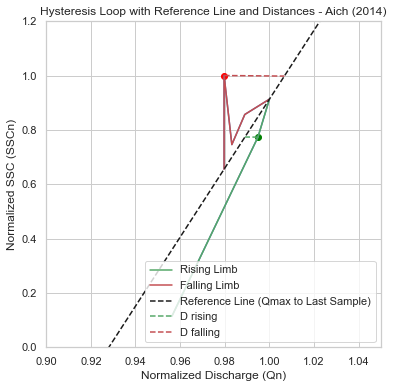

Aich Hysteresis Index for SS: -0.03293678812064866


In [256]:
TempCalc1 = storms['st7_down'].dropna(subset=['SS (uL/L)'])
SS_HI_aich = aich_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], xlim=(0.9, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for SS: {SS_HI_aich}")

Storm 7 - Upstream

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_SS_uL_L.jpg


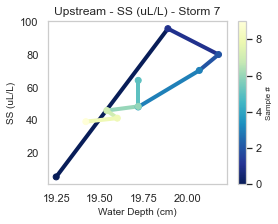

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_DOC_mg_L.jpg


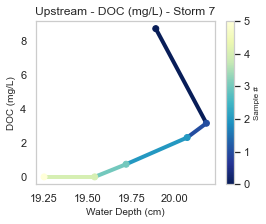

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_POC_mg_L.jpg


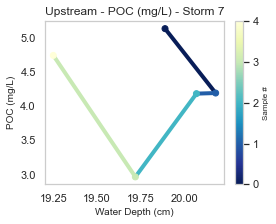

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_N_mg_L.jpg


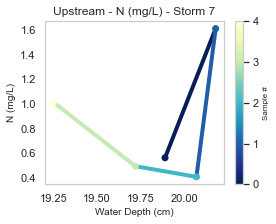

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_fDOM.jpg


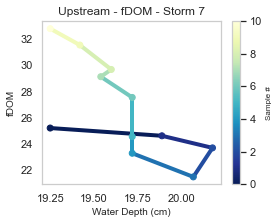

C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_Turbidity.jpg


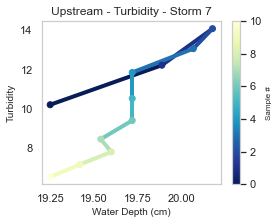

In [257]:
# single plot - upstream reach - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st7_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st7_up'][constituent])
    x = storms['st7_up']['depth'][mask]
    y = storms['st7_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 7', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

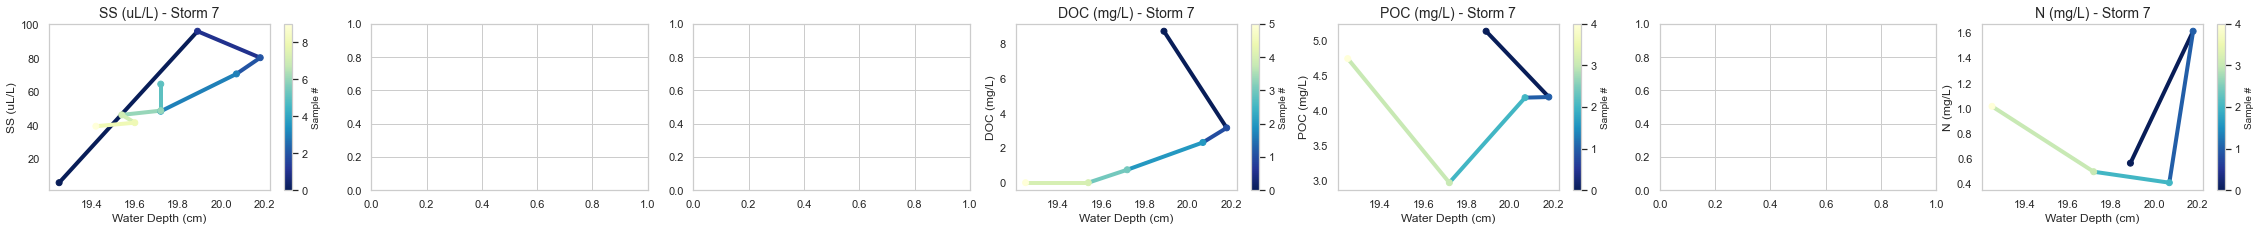

In [258]:
# All constituents - upstream - storm 7
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st7_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax

    # Filter out NaN values
    mask = ~np.isnan(storms['st7_up'][constituent])
    x = storms['st7_up']['depth'][mask]
    y = storms['st7_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # Use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 7', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Water Depth (cm)", fontsize=12)

fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_all_constituents.jpg", 
            bbox_inches='tight', dpi=1000)
plt.show()

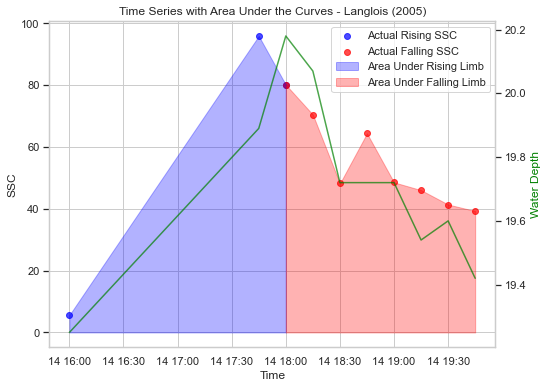

Langois Hysteresis Index for SS: 1.1705512471733113


In [259]:
TempCalc1 = storms['st7_up'].dropna(subset=['SS (uL/L)'])
SS_HI_langois = langois_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for SS: {SS_HI_langois}")

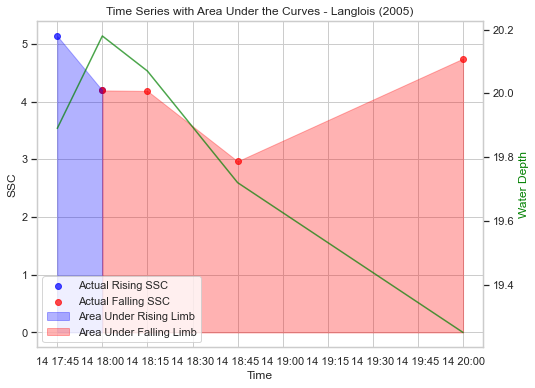

Langois Hysteresis Index for POC: 0.15237768632830362


In [260]:
TempCalc1 = storms['st7_up'].dropna(subset=['POC (mg/L)'])
POC_HI_langois = langois_HI(TempCalc1['POC (mg/L)'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for POC: {POC_HI_langois}")

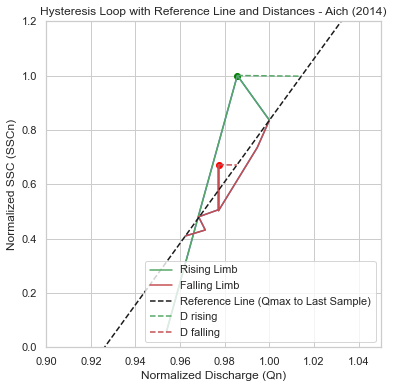

Aich Hysteresis Index for SS: 0.020539306643307238


In [261]:
TempCalc1 = storms['st7_up'].dropna(subset=['SS (uL/L)'])
SS_HI_aich = aich_HI(TempCalc1['SS (uL/L)'], TempCalc1['depth'], xlim=(0.9, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for SS: {SS_HI_aich}")

# Storm Hydrographs & Hysteresis - From Sondes 

Storm 1 - Downstream

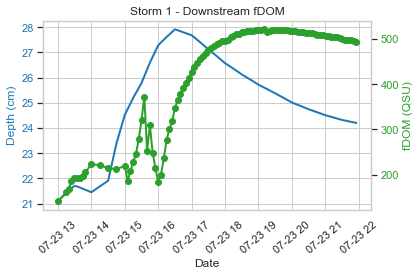

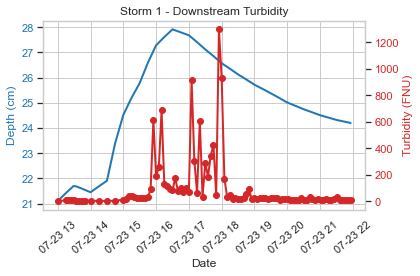

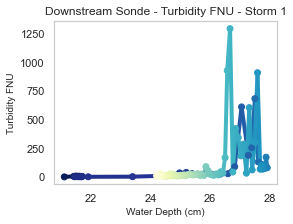

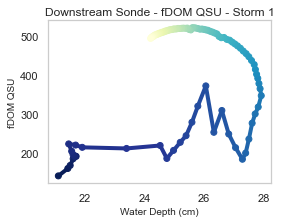

In [262]:
# Define the date range
start_date = '2021-07-23 13:00:00'
end_date = '2021-07-23 22:00:00'
sonde_data = sondes['st1_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 1 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/st1_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 1 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/st1_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 1', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

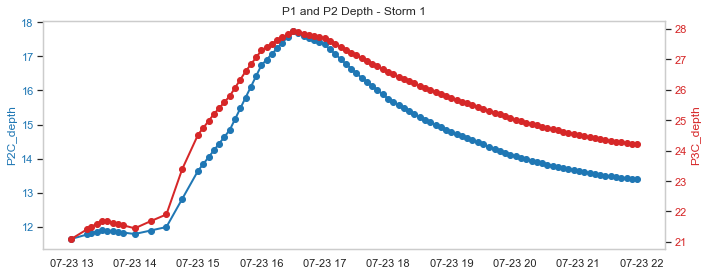

Time lag between P2C_depth and depth peaks:  0 days 00:00:00


In [263]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 1')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and depth peaks: ", time_lag)

Storm 1 - Upstream

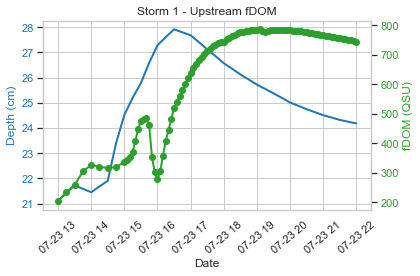

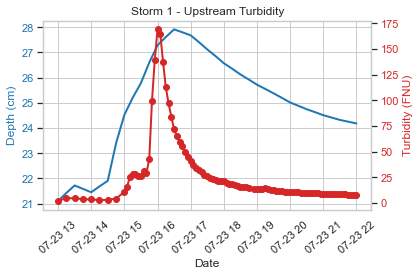

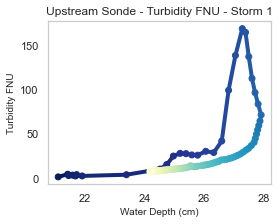

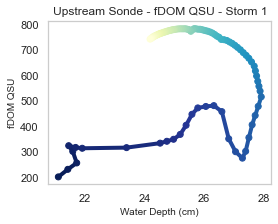

In [264]:
# Define the date range
start_date = '2021-07-23 13:00:00'
end_date = '2021-07-23 22:00:00'
sonde_data = sondes['st1_up_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 1 - Upstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/st1_fdom_up_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 1 - Upstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/st1_turbidity_up_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Upstream Sonde - {constituent} - Storm 1', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm1/storm1_up_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

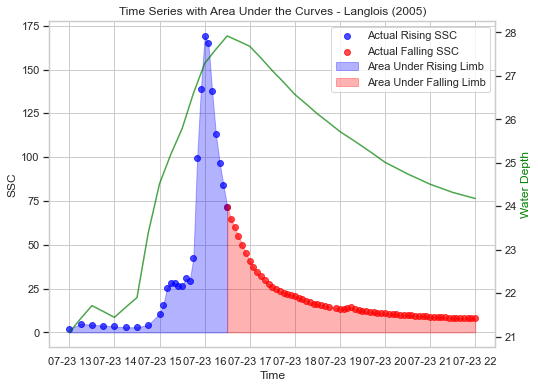

Langois Hysteresis Index for Turbidity: 1.1369396087671901


In [265]:
TempCalc1 = sonde_data.dropna(subset=['Turbidity FNU'])
turb_HI_langois = langois_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for Turbidity: {turb_HI_langois}")

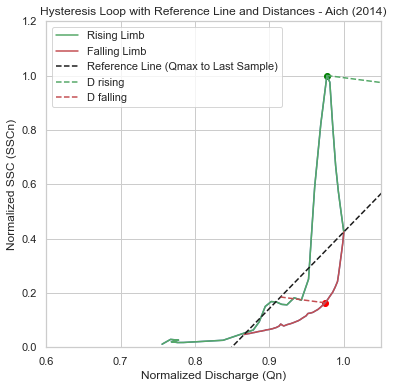

Aich Hysteresis Index for Turbidity: 0.27753235147297184


In [266]:
turb_HI_aich = aich_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], xlim=(0.6, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for Turbidity: {turb_HI_aich}")

Storm 2 - Downstream

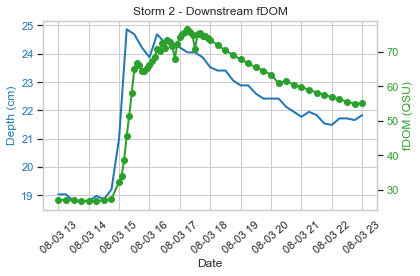

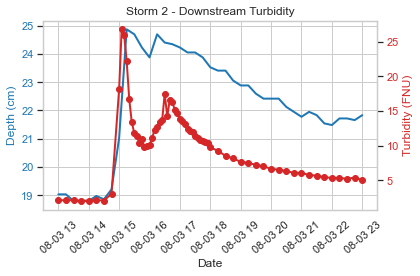

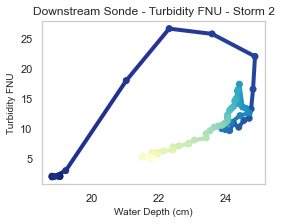

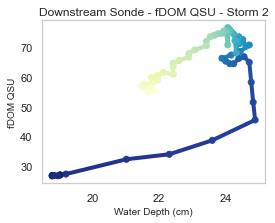

In [267]:
# Define the date range
start_date = '2022-08-03 13:00:00'
end_date = '2022-08-03 23:00:00'
sonde_data = sondes['st2_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 2 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/st2_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 2 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/st2_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 2', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm2/storm2_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

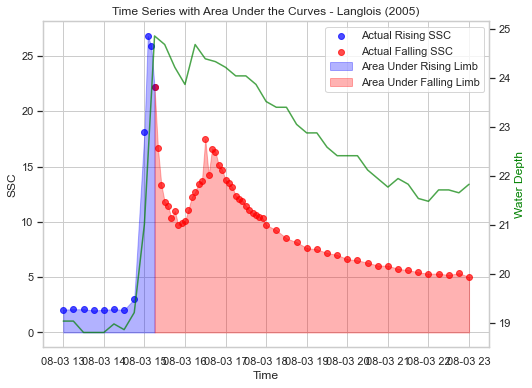

Langois Hysteresis Index for Turbidity: 0.18308961816254893


In [268]:
TempCalc1 = sonde_data.dropna(subset=['Turbidity FNU'])
turb_HI_langois = langois_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for Turbidity: {turb_HI_langois}")

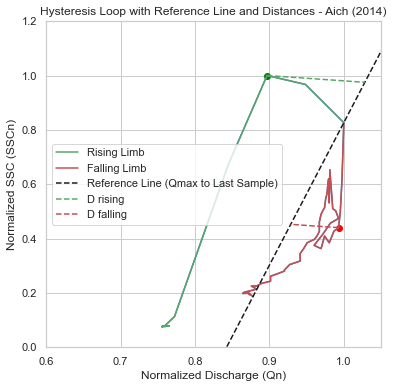

Aich Hysteresis Index for Turbidity: 0.19932805250443636


In [269]:
turb_HI_aich = aich_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], xlim=(0.6, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for Turbidity: {turb_HI_aich}")

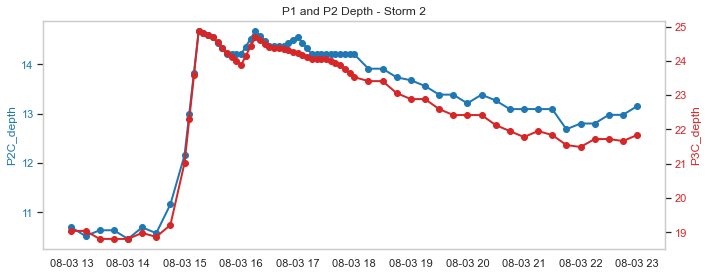

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:00:00


In [270]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 2')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Storm 3 - Downstream

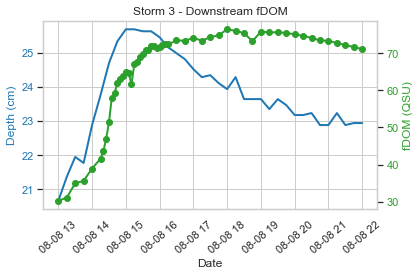

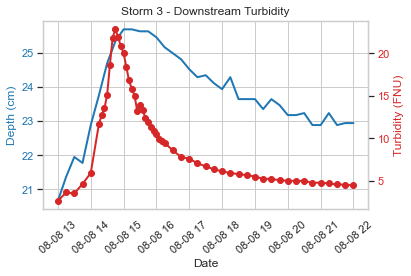

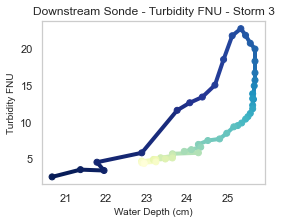

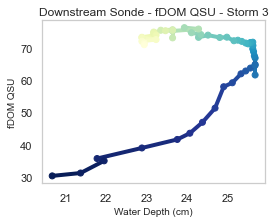

In [271]:
# Define the date range
start_date = '2022-08-08 13:00:00'
end_date = '2022-08-08 22:00:00'
sonde_data = sondes['st3_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 3 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/st3_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 3 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/st3_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 3', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm3/storm3_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

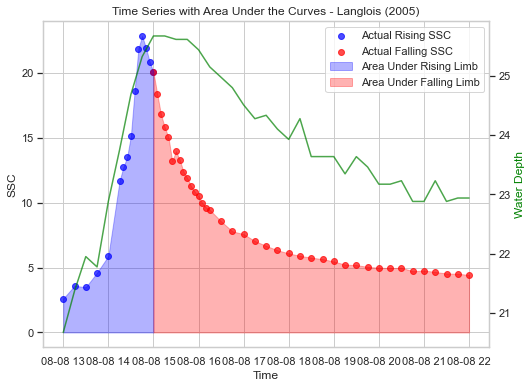

Langois Hysteresis Index for Turbidity: 0.3973031301758319


In [272]:
TempCalc1 = sonde_data.dropna(subset=['Turbidity FNU'])
turb_HI_langois = langois_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for Turbidity: {turb_HI_langois}")

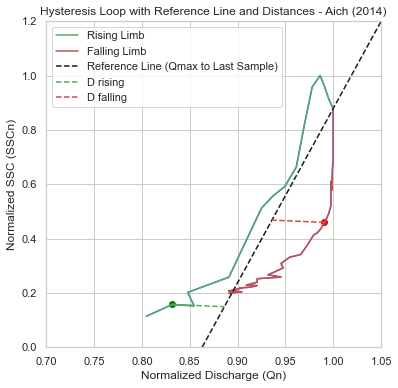

Aich Hysteresis Index for Turbidity: 0.11052268373418933


In [273]:
turb_HI_aich = aich_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], xlim=(0.7, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for Turbidity: {turb_HI_aich}")

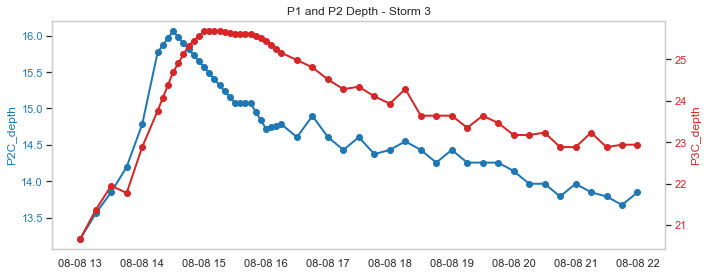

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:30:00


In [274]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 3')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

In [275]:
print("Time of P2C_depth peak: ", peak_P2C)
print("Time of P3C_depth peak: ", peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Time of P2C_depth peak:  2022-08-08 14:30:00
Time of P3C_depth peak:  2022-08-08 15:00:00
Time lag between P2C_depth and P3C_depth peaks:  0 days 00:30:00


Storm 4 - Downstream

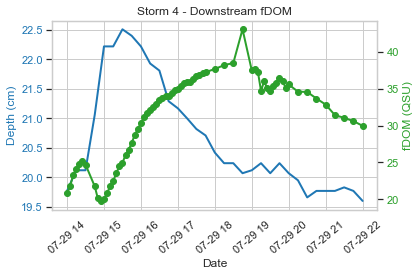

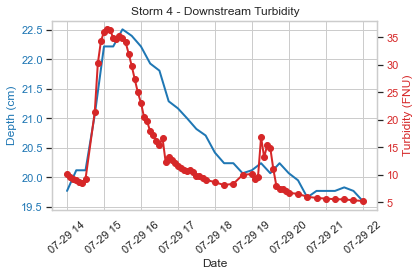

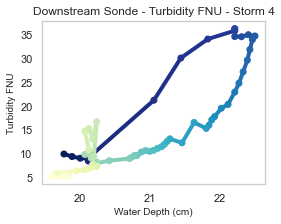

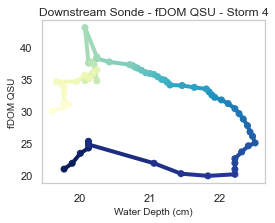

In [276]:
# Define the date range
start_date = '2023-07-29 13:00:00'
end_date = '2023-07-29 22:00:00'
sonde_data = sondes['st4_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/st4_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/st4_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 4', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

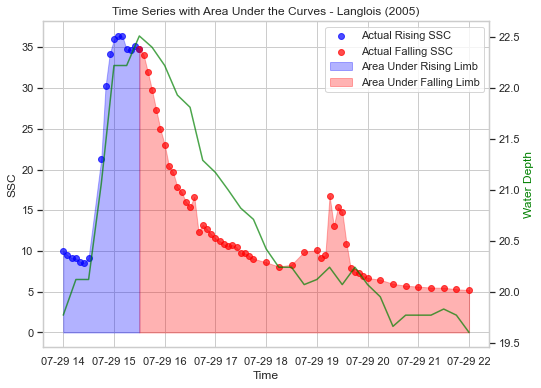

Langois Hysteresis Index for Turbidity: 0.4720703022835456


In [277]:
TempCalc1 = sonde_data.dropna(subset=['Turbidity FNU'])
turb_HI_langois = langois_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for Turbidity: {turb_HI_langois}")

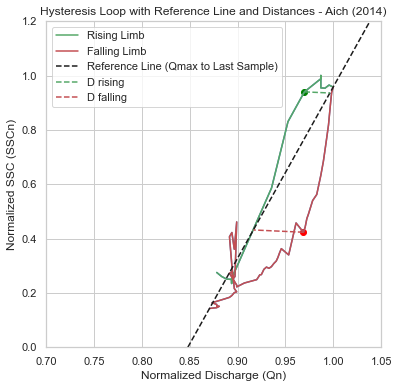

Aich Hysteresis Index for Turbidity: 0.07993222023390308


In [278]:
turb_HI_aich = aich_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], xlim=(0.7, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for Turbidity: {turb_HI_aich}")

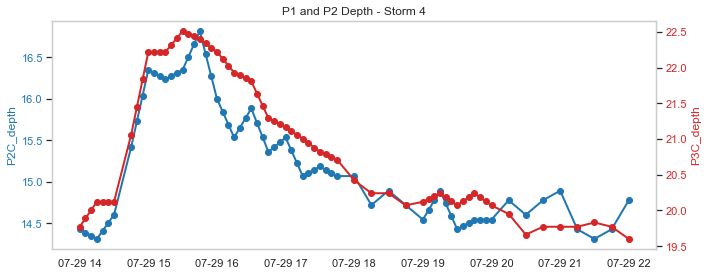

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:15:00


In [279]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 4')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Storm 4 - Upstream

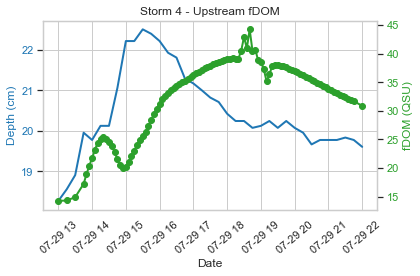

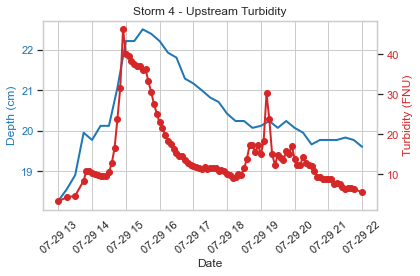

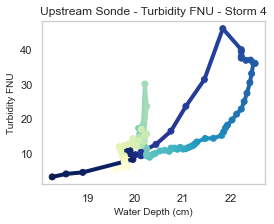

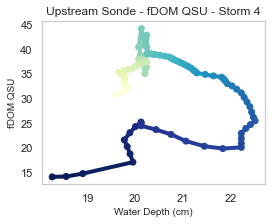

In [280]:
# Define the date range
start_date = '2023-07-29 13:00:00'
end_date = '2023-07-29 22:00:00'
sonde_data = sondes['st4_up_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Upstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/st4_fdom_up_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Upstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/st4_turbidity_up_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Upstream Sonde - {constituent} - Storm 4', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm4/storm4_up_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

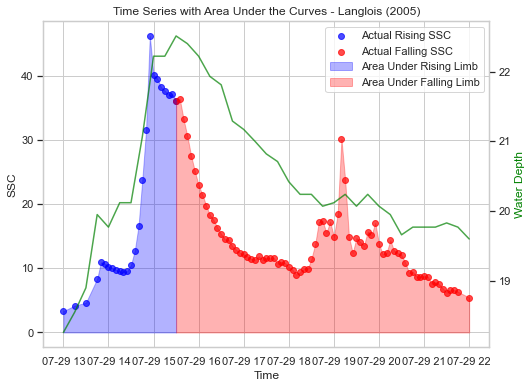

Langois Hysteresis Index for Turbidity: 0.4756993006993007


In [281]:
TempCalc1 = sonde_data.dropna(subset=['Turbidity FNU'])
turb_HI_langois = langois_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for Turbidity: {turb_HI_langois}")

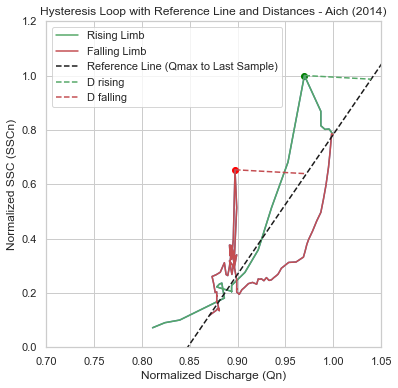

Aich Hysteresis Index for Turbidity: -0.005005392839247724


In [282]:
turb_HI_aich = aich_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], xlim=(0.7, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for Turbidity: {turb_HI_aich}")

Storm 5 - Downstream

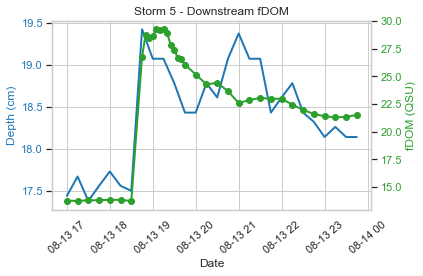

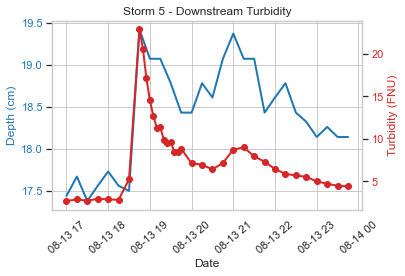

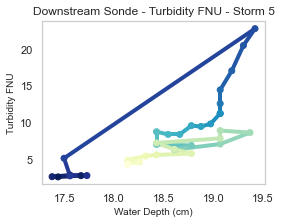

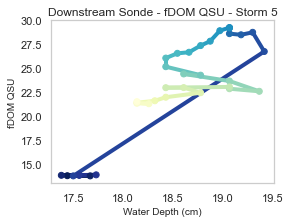

In [283]:
# Define the date range
start_date = '2023-08-13 17:00:00'
end_date = '2023-08-14 3:00:00'
sonde_data = sondes['st5_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 5 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/st5_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 5 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/st5_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 5', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm5/storm5_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

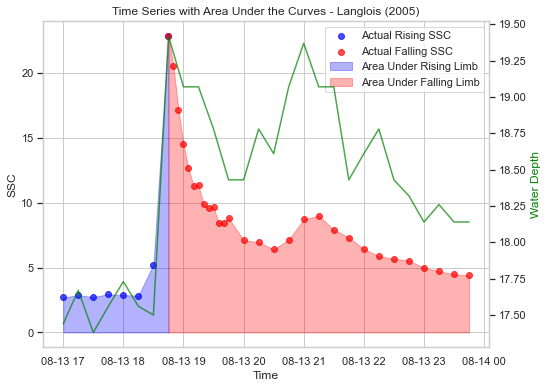

Langois Hysteresis Index for Turbidity: 0.20858155493552522


In [284]:
TempCalc1 = sonde_data.dropna(subset=['Turbidity FNU'])
turb_HI_langois = langois_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for Turbidity: {turb_HI_langois}")

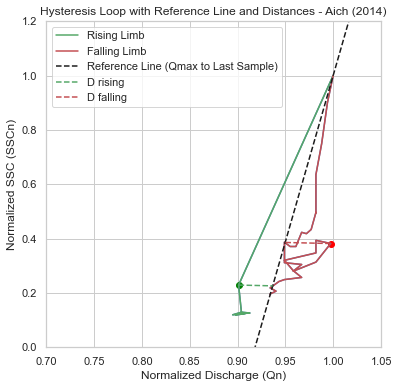

Aich Hysteresis Index for Turbidity: 0.08353294574139636


In [285]:
turb_HI_aich = aich_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], xlim=(0.7, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for Turbidity: {turb_HI_aich}")

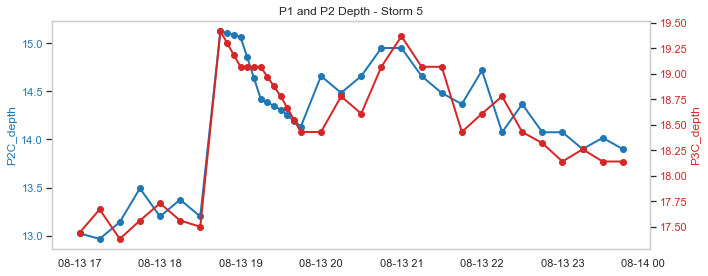

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:00:00


In [286]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 5')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Storm 6 - Downstream

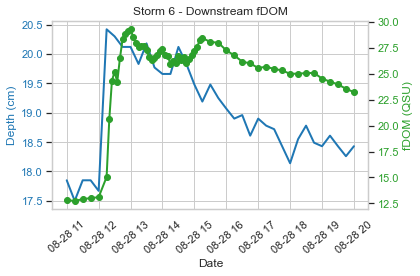

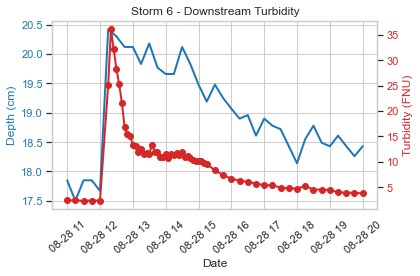

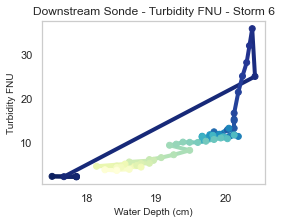

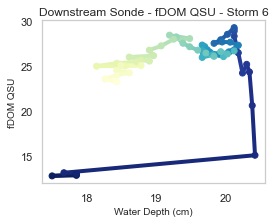

In [287]:
# Define the date range
start_date = '2023-08-28 11:00:00'
end_date = '2023-08-28 20:00:00'
sonde_data = sondes['st6_down_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 6 - Downstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/st6_fdom_down_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 6 - Downstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/st6_turbidity_down_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Downstream Sonde - {constituent} - Storm 6', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm6/storm6_down_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

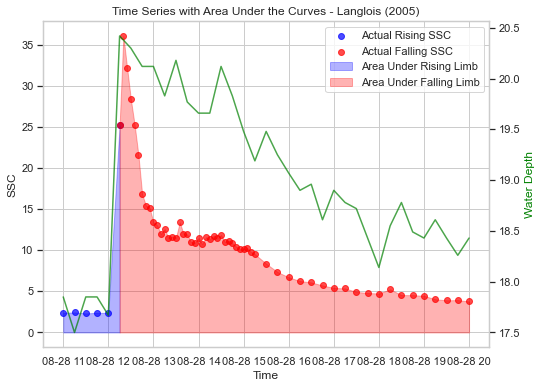

Langois Hysteresis Index for Turbidity: 0.08461338350686357


In [288]:
TempCalc1 = sonde_data.dropna(subset=['Turbidity FNU'])
turb_HI_langois = langois_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for Turbidity: {turb_HI_langois}")

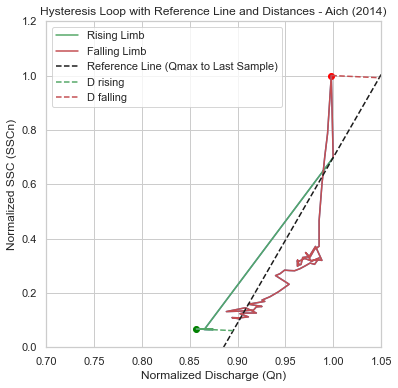

Aich Hysteresis Index for Turbidity: -0.011878916198813594


In [289]:
turb_HI_aich = aich_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], xlim=(0.7, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for Turbidity: {turb_HI_aich}")

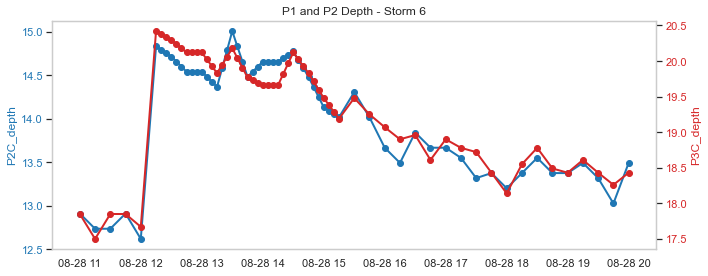

Time lag between P2C_depth and P3C_depth peaks:  0 days 01:15:00


In [290]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 6')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Storm 7 - Upstream

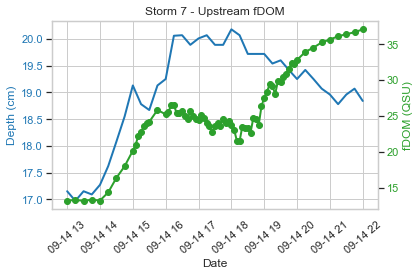

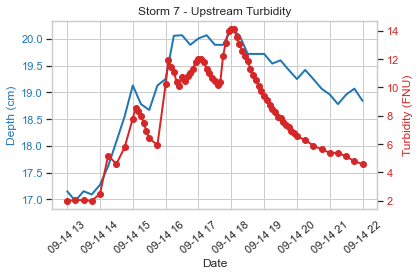

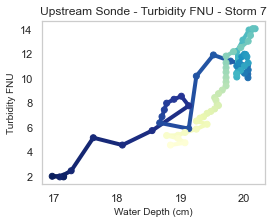

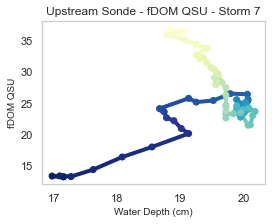

In [291]:
# Define the date range
start_date = '2023-09-14 13:00:00'
end_date = '2023-09-14 22:00:00'
sonde_data = sondes['st7_up_sonde'].loc[start_date:end_date] # select the data within the date range

# fDOM plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('fDOM (QSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['fDOM QSU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 7 - Upstream fDOM")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/st7_fdom_up_sonde.jpg", dpi=300)
plt.show()

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 7 - Upstream Turbidity")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/st7_turbidity_up_sonde.jpg", dpi=1000)
plt.show()

# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
cm = plt.cm.get_cmap('YlGnBu_r')
for constituent in constituents:
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'Upstream Sonde - {constituent} - Storm 7', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/storm7/storm7_up_sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

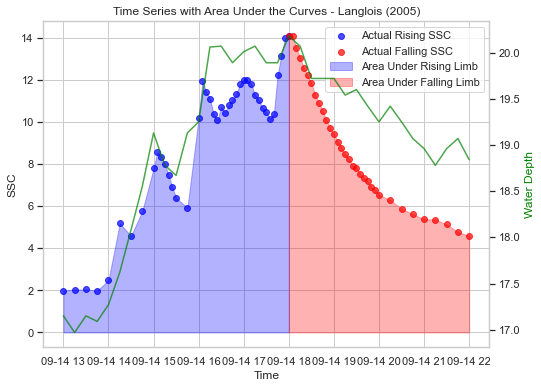

Langois Hysteresis Index for Turbidity: 1.2196341695431197


In [292]:
TempCalc1 = sonde_data.dropna(subset=['Turbidity FNU'])
turb_HI_langois = langois_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], TempCalc1.index)
print(f"Langois Hysteresis Index for Turbidity: {turb_HI_langois}")

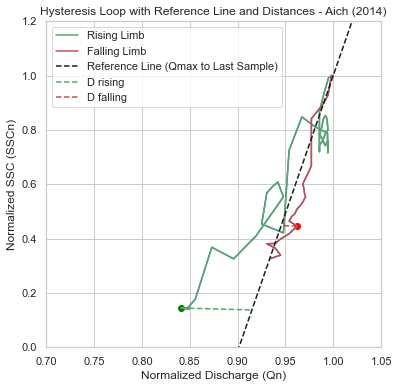

Aich Hysteresis Index for Turbidity: 0.09125887403333392


In [293]:
turb_HI_aich = aich_HI(TempCalc1['Turbidity FNU'], TempCalc1['depth'], xlim=(0.7, 1.05), ylim=(0, 1.2))
print(f"Aich Hysteresis Index for Turbidity: {turb_HI_aich}")

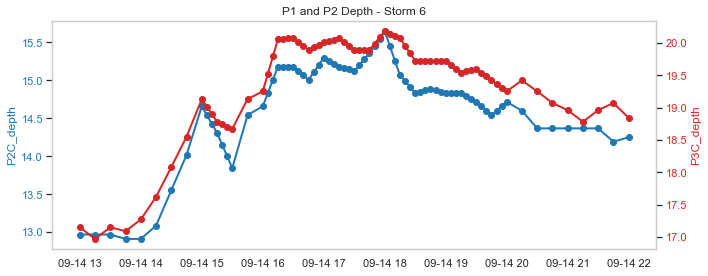

Time lag between P2C_depth and P3C_depth peaks:  0 days 00:00:00


In [294]:
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:blue'
ax1.plot(sonde_data.index, sonde_data['P2C_depth'], 'o-', color=color, linewidth=2)
ax1.set_ylabel('P2C_depth', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # remove grid
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
# we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['P3C_depth'],'o-', color=color, linewidth=2)
ax2.set_ylabel('P3C_depth', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # remove grid

plt.title('P1 and P2 Depth - Storm 6')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate the time lag between the two peaks
peak_P2C = sonde_data['P2C_depth'].idxmax()
peak_P3C = sonde_data['P3C_depth'].idxmax()
time_lag = np.abs(peak_P2C - peak_P3C)
print("Time lag between P2C_depth and P3C_depth peaks: ", time_lag)

Plots for DOE PI meeting 2024 poster

C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_SS_uL_L.jpg


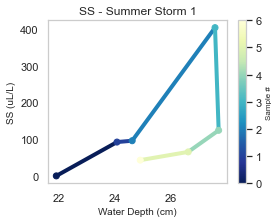

C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_SRP_mg_L.jpg


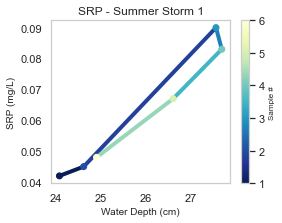

C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_TP_mg_L.jpg


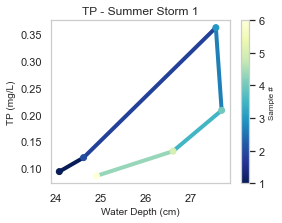

C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_DOC_mg_L.jpg


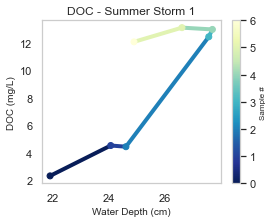

C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_POC_mg_L.jpg


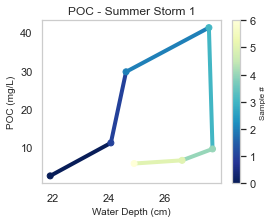

C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_PP_mg_L.jpg


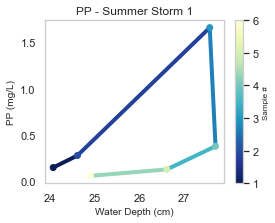

C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_fDOM.jpg


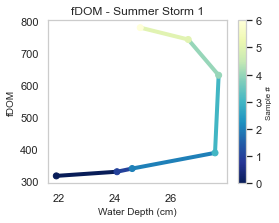

C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_Turbidity.jpg


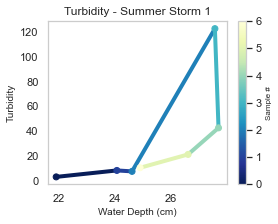

In [295]:
# single plot storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
constituent_name = ['SS', 'SRP', 'TP', 'DOC', 'POC', 'PP', 'N', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent, name in zip(constituents, constituent_name):
    if constituent not in storms['st1_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['depth']))
    num_points = len(storms['st1_up']['depth'])
    colorline(storms['st1_up']['depth'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['depth'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'{name} - Summer Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Water Depth (cm)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/summer_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

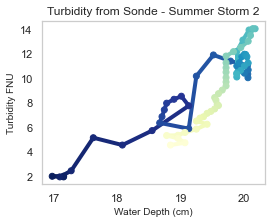

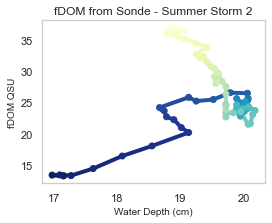

In [296]:
# Hysteresis plots
constituents = ['Turbidity FNU', 'fDOM QSU']
constituent_name = ['Turbidity', 'fDOM']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent, name in zip(constituents, constituent_name):
    fig, (ax1) = plt.subplots(figsize=(4,3))
    plt.sca(ax1)
    z = np.linspace(0, 1, len(sonde_data['depth']))
    num_points = len(sonde_data['depth'])
    colorline(sonde_data['depth'], sonde_data[constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc =ax1.scatter(sonde_data['depth'], sonde_data[constituent], c=range(num_points), cmap=cm, zorder=100)
    plt.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax1.set_title(f'{name} from Sonde - Summer Storm 2', fontsize=12)
    ax1.set_ylabel(f"{constituent}", fontsize=10)
    ax1.set_xlabel("Water Depth (cm)", fontsize=10)
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/huck4481/Documents/GitHub/La_Jara/Presentations/DOEPI_Poster_2024/sonde_{safe_constituent}.jpg"
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()

# Storm Suspended Sediment - Post 24h buffer

Storm 4

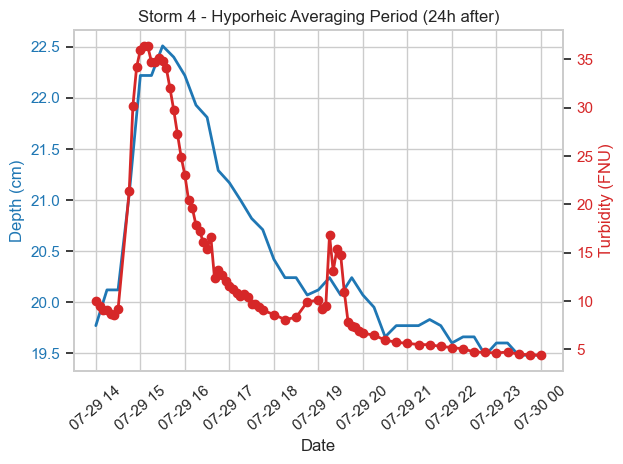

In [24]:
# Define the date range
start_date = '2023-07-28 15:30:00'
end_date = '2023-07-30 15:30:00'
sonde_data = sondes['st4_down_sonde'].loc[start_date:end_date] # select the data within the date range

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Hyporheic Averaging Period (24h after)")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

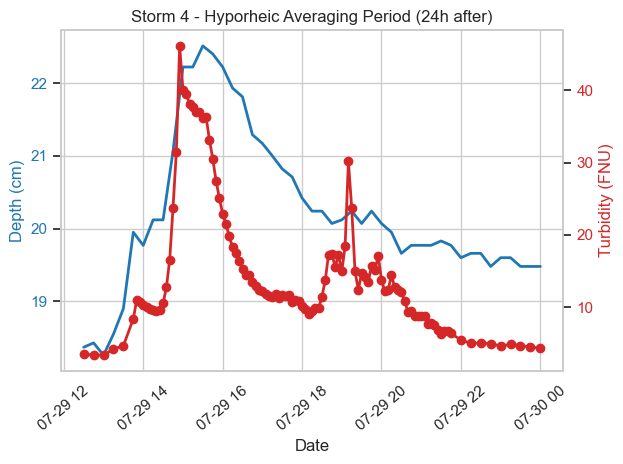

In [26]:
# Define the date range
start_date = '2023-07-29 12:30:00'
end_date = '2023-07-30 15:30:00'
sonde_data = sondes['st4_up_sonde'].loc[start_date:end_date] # select the data within the date range

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 4 - Hyporheic Averaging Period (24h after)")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Storm 5

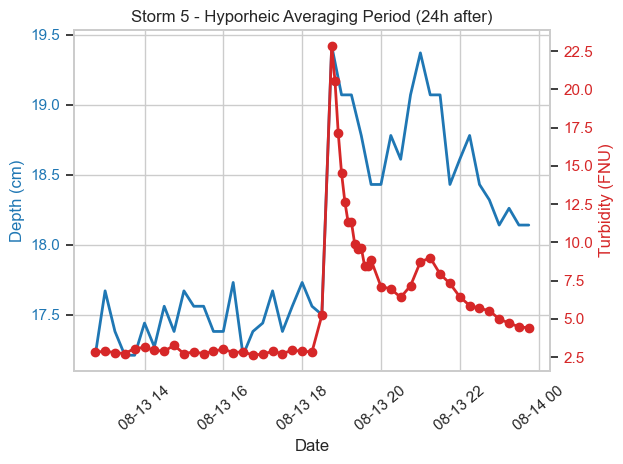

In [30]:
# Define the date range
start_date = '2023-08-13 12:45:00'
end_date = '2023-08-15 18:45:00'
sonde_data = sondes['st5_down_sonde'].loc[start_date:end_date] # select the data within the date range


# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 5 - Hyporheic Averaging Period (24h after)")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Storm 6

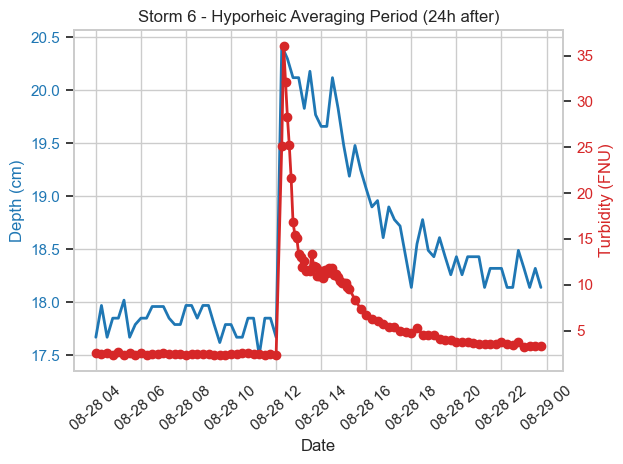

In [34]:
# Define the date range
start_date = '2023-08-28 04:00:00'
end_date = '2023-08-29 20:00:00'
sonde_data = sondes['st6_down_sonde'].loc[start_date:end_date] # select the data within the date range

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 6 - Hyporheic Averaging Period (24h after)")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Storm 7

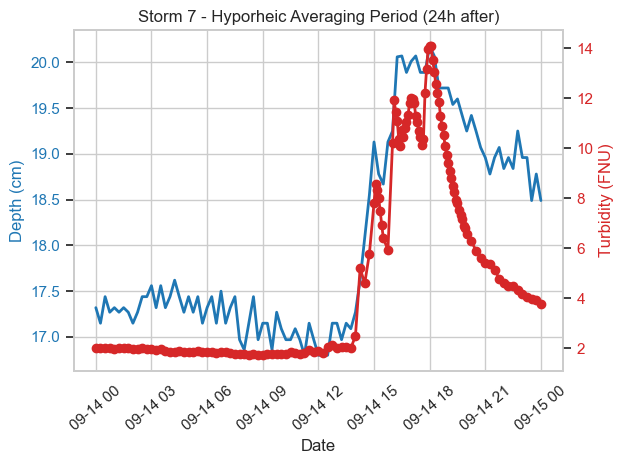

In [35]:
# Define the date range
start_date = '2023-09-13 18:00:00'
end_date = '2023-09-15 22:00:00'
sonde_data = sondes['st7_up_sonde'].loc[start_date:end_date] # select the data within the date range

# Turbidity plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Depth (cm)', color=color)
ax1.plot(sonde_data.index, sonde_data['depth'], color=color, linestyle="-", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=40)
ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Turbidity (FNU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sonde_data.index, sonde_data['Turbidity FNU'], "o-", color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Storm 7 - Hyporheic Averaging Period (24h after)")
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()